# 📊 Clasificación de Leads para Optimización de Marketing en Fintech

## 🎯 Contexto del Problema

Trabajamos en el equipo de analítica de una **fintech** que busca optimizar su presupuesto de marketing. Nuestro objetivo es construir un modelo que clasifique prospectos (leads) según su **probabilidad de conversión**, para decidir en qué contactos vale la pena invertir más recursos.

### ¿Por qué es importante este problema?

- **Costo de adquisición**: No todos los leads tienen la misma probabilidad de convertir
- **Optimización de recursos**: Enfocarse en los leads más prometedores maximiza el ROI
- **Personalización**: Permite estrategias diferenciadas según el perfil del usuario

### 📚 Contenidos de la Clase

En esta clase exploramos algoritmos que capturan relaciones complejas en los datos:

1. **KNN (K-Nearest Neighbors)**: Clasifica por similitud sin entrenar reglas explícitas
2. **Árboles de Decisión**: Generan estructuras jerárquicas de reglas comprensibles
3. **SVM (Support Vector Machines)**: Encuentra la mejor separación entre clases maximizando el margen
4. **Métricas de Evaluación**: Más allá del accuracy, necesitamos precisión, recall, F1-score y AUC

---

## 📦 Importación de Librerías

Importamos todas las herramientas que necesitaremos para nuestro análisis.

In [1]:
# Manipulación de datos
import pandas as pd
import numpy as np

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de visualización
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

# Preprocesamiento
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Modelos de clasificación
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

# Métricas y evaluación
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report,
    roc_curve,
    roc_auc_score,
    ConfusionMatrixDisplay
)

# Para visualización de árboles
from sklearn.tree import plot_tree

# Ignorar advertencias
import warnings
warnings.filterwarnings('ignore')

print("✅ Todas las librerías importadas correctamente")

✅ Todas las librerías importadas correctamente


### 📌 Lectura data-driven (para explicar en clase)

**Lectura data-driven (para explicar en clase):** El bloque anterior cargó todo el stack que usaremos: **pandas/numpy** para datos, **matplotlib/seaborn** para gráficos, **sklearn** para train_test_split, StandardScaler, LabelEncoder, los cuatro clasificadores (KNN, Árbol, SVM, Regresión Logística) y las métricas (accuracy, precision, recall, F1, matriz de confusión, ROC-AUC). El mensaje "✅ Todas las librerías importadas correctamente" confirma que el entorno está listo y no hubo errores de importación.


---

## 📁 Paso 1: Carga y Exploración Inicial del Dataset

### Descripción de las Variables

| Variable | Tipo | Descripción |
|----------|------|-------------|
| `age` | Numérica | Edad del usuario |
| `income` | Numérica | Ingreso estimado |
| `web_visits` | Numérica | Cantidad de visitas previas al sitio |
| `clicked_ad` | Binaria | Si hizo clic en una campaña reciente (1 = sí, 0 = no) |
| `device_type` | Categórica | Tipo de dispositivo utilizado (mobile, desktop, tablet) |
| `time_on_site` | Numérica | Minutos promedio por visita |
| `past_purchases` | Numérica | Cantidad de compras anteriores |
| **`converted`** | **Binaria (Target)** | **Variable objetivo: 1 = compró, 0 = no compró** |

In [2]:
# Carga del dataset
df = pd.read_csv('../data/martech_homework_dataset_fixed.csv')

# Primeras filas
print("🔍 Primeras filas del dataset:")
display(df.head(10))

🔍 Primeras filas del dataset:


,age,income,web_visits,clicked_ad,device_type,time_on_site,past_purchases,converted
0,24,43767,4,1,desktop,2.06,0,0
1,44,63513,4,0,tablet,1.74,2,0
2,37,65772,5,0,desktop,2.41,2,0
3,19,40009,4,1,desktop,4.05,3,1
4,29,62123,5,1,tablet,2.53,1,0
5,51,26972,2,0,desktop,1.66,0,0
6,10,51960,4,0,mobile,0.73,1,0
7,30,37986,2,0,mobile,2.56,0,0
8,47,42884,5,1,mobile,2.62,1,0
9,26,35858,5,0,desktop,1.66,2,0


### 📌 Lectura data-driven (para explicar en clase)

**Lectura data-driven (para explicar en clase):** Aquí se **cargó el CSV** del dataset. El output muestra las **primeras 10 filas**: 8 columnas (age, income, web_visits, clicked_ad, device_type, time_on_site, past_purchases, converted). Podemos ver que hay una mezcla de no conversión (converted=0) y conversión (converted=1); en esta muestra solo 1 de 10 convirtió. Esto nos da una idea visual de la estructura antes de pasar a estadísticas.


In [3]:
# Información general del dataset
print("📊 Información general del dataset:")
print(f"\n• Dimensiones: {df.shape[0]} filas x {df.shape[1]} columnas")
print(f"\n• Tipos de datos:")
print(df.dtypes)
print(f"\n• Valores nulos por columna:")
print(df.isnull().sum())
print(f"\n• Estadísticas descriptivas:")
display(df.describe())

📊 Información general del dataset:

• Dimensiones: 1000 filas x 8 columnas

• Tipos de datos:
age                 int64
income              int64
web_visits          int64
clicked_ad          int64
device_type        object
time_on_site      float64
past_purchases      int64
converted           int64
dtype: object

• Valores nulos por columna:
age               0
income            0
web_visits        0
clicked_ad        0
device_type       0
time_on_site      0
past_purchases    0
converted         0
dtype: int64

• Estadísticas descriptivas:


,age,income,web_visits,clicked_ad,time_on_site,past_purchases,converted
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,34.100000,55125.33800,3.032000,0.387000,2.473370,1.181000,0.300000
std,10.013504,14377.33679,1.758997,0.487307,1.006251,1.083242,0.458487
min,2.000000,-2020.00000,0.000000,0.000000,-1.080000,0.000000,0.000000
25%,28.000000,45416.00000,2.000000,0.000000,1.800000,0.000000,0.000000
50%,34.000000,55726.50000,3.000000,0.000000,2.500000,1.000000,0.000000
75%,41.000000,64807.75000,4.000000,1.000000,3.122500,2.000000,1.000000
max,70.000000,97760.00000,10.000000,1.000000,5.810000,6.000000,1.000000


### 📌 Lectura data-driven (para explicar en clase)

**Lectura data-driven (para explicar en clase):** El output nos da **dimensiones (1000 filas × 8 columnas)**, **tipos** (int64, float64, object para device_type) y **cero nulos** en todas las columnas. Las estadísticas descriptivas muestran rangos y promedios: por ejemplo edad e ingresos en qué escala están, tiempo en sitio, compras previas, etc. Esto es la base para decidir codificación y escalado más adelante.


🎯 Distribución de la Variable Objetivo (converted):
converted
0    700
1    300
Name: count, dtype: int64

Proporción de conversión: 30.00%
Proporción de no conversión: 70.00%


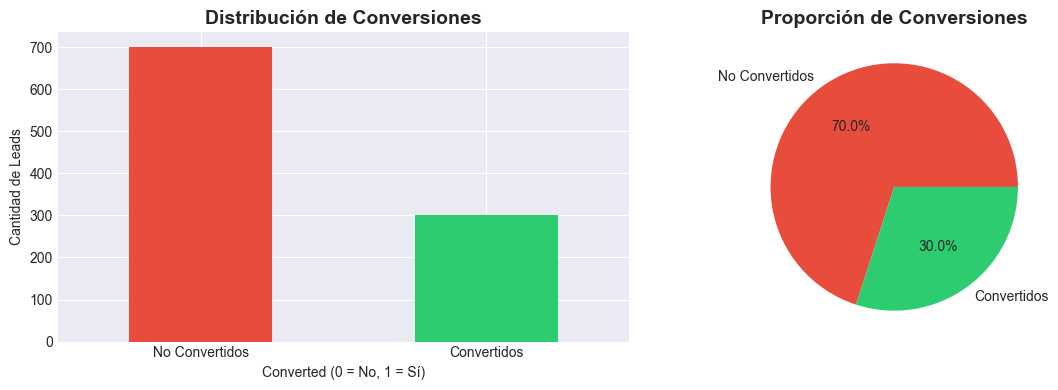


⚠️ Observación: Si las clases están desbalanceadas, las métricas como Precision, Recall y F1-Score serán más informativas que el Accuracy.


In [4]:
# Distribución de la variable objetivo
print("🎯 Distribución de la Variable Objetivo (converted):")
print(df['converted'].value_counts())
print(f"\nProporción de conversión: {df['converted'].mean():.2%}")
print(f"Proporción de no conversión: {(1 - df['converted'].mean()):.2%}")

# Visualización
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

# Gráfico de barras
df['converted'].value_counts().plot(kind='bar', ax=ax[0], color=['#e74c3c', '#2ecc71'])
ax[0].set_title('Distribución de Conversiones', fontsize=14, fontweight='bold')
ax[0].set_xlabel('Converted (0 = No, 1 = Sí)')
ax[0].set_ylabel('Cantidad de Leads')
ax[0].set_xticklabels(['No Convertidos', 'Convertidos'], rotation=0)

# Gráfico de torta
df['converted'].value_counts().plot(kind='pie', ax=ax[1], autopct='%1.1f%%', 
                                     colors=['#e74c3c', '#2ecc71'],
                                     labels=['No Convertidos', 'Convertidos'])
ax[1].set_title('Proporción de Conversiones', fontsize=14, fontweight='bold')
ax[1].set_ylabel('')

plt.tight_layout()
plt.show()

print("\n⚠️ Observación: Si las clases están desbalanceadas, las métricas como Precision, Recall y F1-Score serán más informativas que el Accuracy.")

### 📌 Lectura data-driven (para explicar en clase)

**Lectura data-driven (para explicar en clase):** En este bloque se revisó la **distribución del target (converted)**. El output muestra conteos por clase (0 y 1). En el dataset hay **700 no conversiones y 300 conversiones** (30% de conversión), es decir un desbalance moderado. Eso justifica más adelante mirar no solo accuracy sino precisión, recall y F1, y eventualmente estratificar en train/test.


---

## 🔍 Paso 2: Análisis Exploratorio de Datos (EDA)

En esta sección exploraremos las relaciones entre las variables y la variable objetivo.

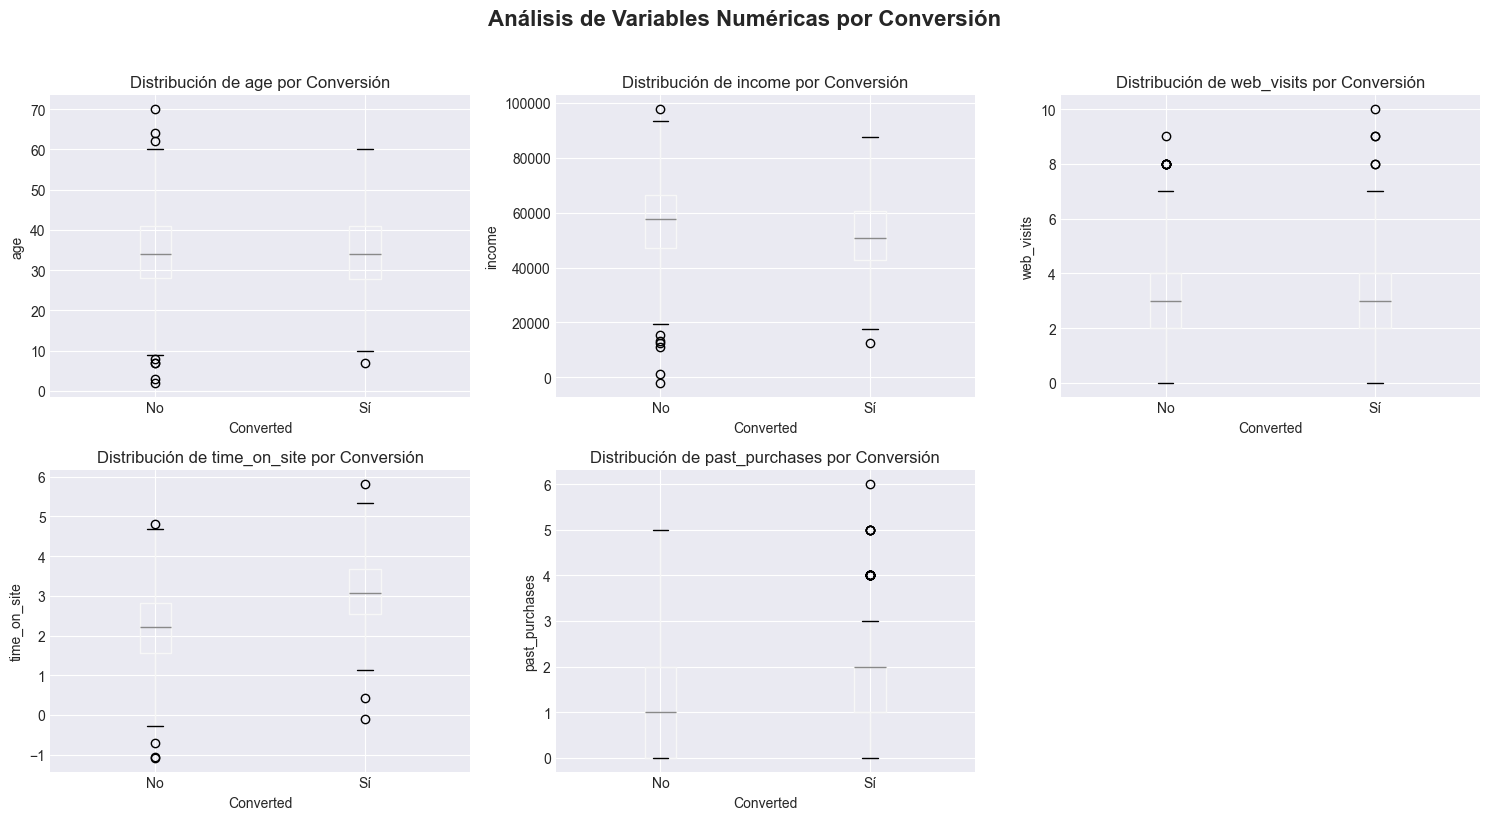


📌 Observaciones clave:
• Buscamos diferencias sistemáticas entre convertidos y no convertidos
• Variables con mayor separación son mejores predictores


In [5]:
# Análisis de variables numéricas por conversión
numeric_cols = ['age', 'income', 'web_visits', 'time_on_site', 'past_purchases']

fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.flatten()

for idx, col in enumerate(numeric_cols):
    df.boxplot(column=col, by='converted', ax=axes[idx])
    axes[idx].set_title(f'Distribución de {col} por Conversión')
    axes[idx].set_xlabel('Converted')
    axes[idx].set_ylabel(col)
    plt.sca(axes[idx])
    plt.xticks([1, 2], ['No', 'Sí'])

# Ocultar el último subplot si sobra
axes[-1].axis('off')

plt.suptitle('Análisis de Variables Numéricas por Conversión', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

print("\n📌 Observaciones clave:")
print("• Buscamos diferencias sistemáticas entre convertidos y no convertidos")
print("• Variables con mayor separación son mejores predictores")

### 📌 Lectura data-driven (para explicar en clase)

**Lectura data-driven (para explicar en clase):** El gráfico muestra la **distribución de la variable objetivo**: cuántos leads convirtieron (1) vs no (0). Los números exactos (700 vs 300) reflejan el 30% de conversión. En clase se puede decir que la clase positiva es minoritaria y por eso las métricas que miran solo la clase positiva (precision, recall, F1) van a ser importantes.


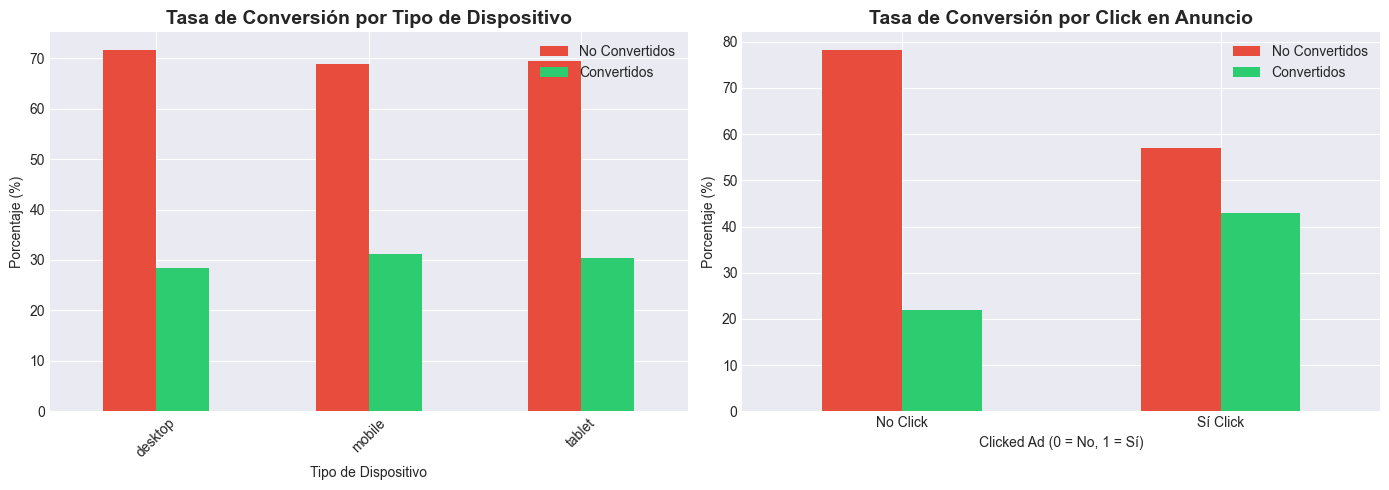

In [6]:
# Análisis de variables categóricas
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# device_type
device_conversion = pd.crosstab(df['device_type'], df['converted'], normalize='index') * 100
device_conversion.plot(kind='bar', ax=axes[0], color=['#e74c3c', '#2ecc71'])
axes[0].set_title('Tasa de Conversión por Tipo de Dispositivo', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Tipo de Dispositivo')
axes[0].set_ylabel('Porcentaje (%)')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)
axes[0].legend(['No Convertidos', 'Convertidos'])

# clicked_ad
clicked_conversion = pd.crosstab(df['clicked_ad'], df['converted'], normalize='index') * 100
clicked_conversion.plot(kind='bar', ax=axes[1], color=['#e74c3c', '#2ecc71'])
axes[1].set_title('Tasa de Conversión por Click en Anuncio', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Clicked Ad (0 = No, 1 = Sí)')
axes[1].set_ylabel('Porcentaje (%)')
axes[1].set_xticklabels(['No Click', 'Sí Click'], rotation=0)
axes[1].legend(['No Convertidos', 'Convertidos'])

plt.tight_layout()
plt.show()

### 📌 Lectura data-driven (para explicar en clase)

**Lectura data-driven (para explicar en clase):** Aquí se visualiza la **distribución de device_type** (mobile, desktop, tablet) y su relación con la conversión. Los conteos o proporciones por dispositivo nos dicen si el canal tiene impacto en conversión; eso respalda incluir device_type como feature y codificarlo (one-hot) en el preprocesamiento.


📊 Matriz de Correlación con la Variable Objetivo


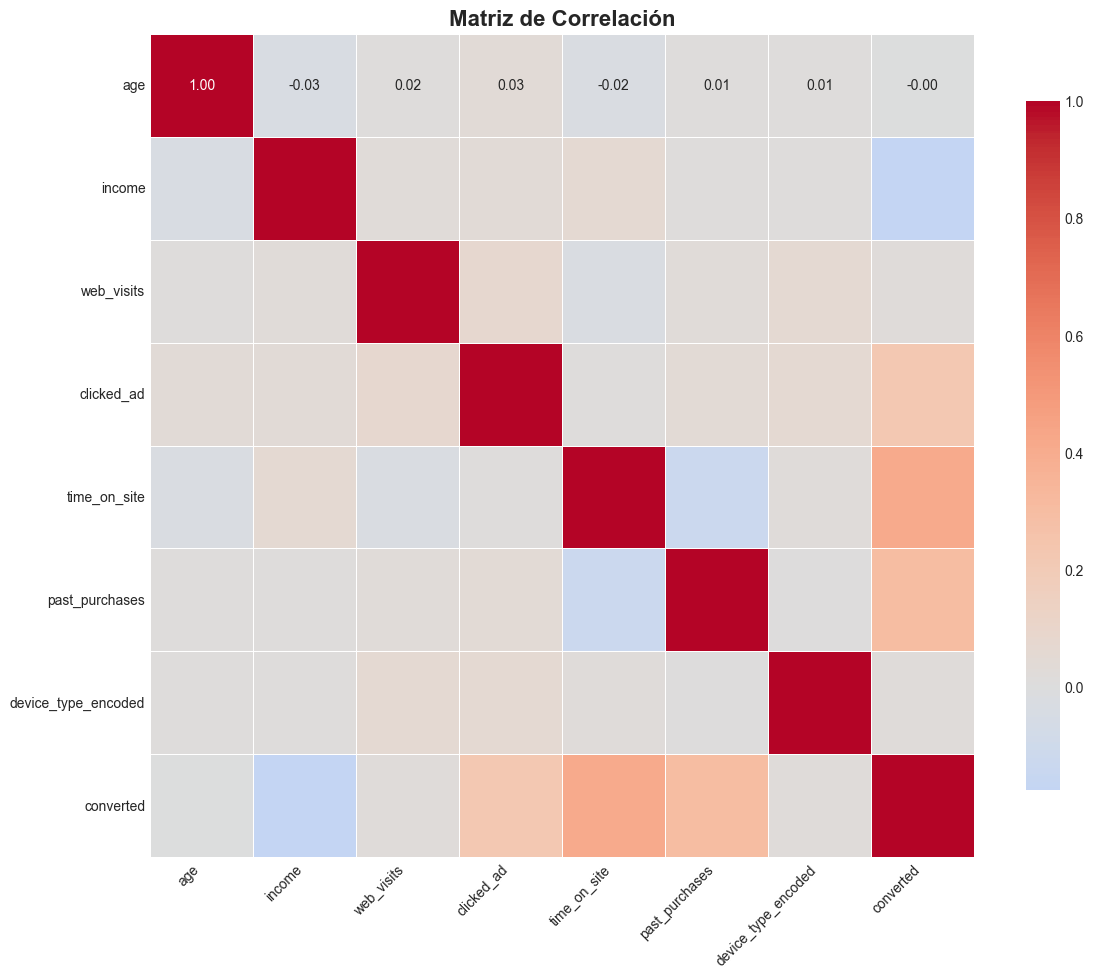


🔑 Correlaciones con 'converted':
converted              1.000000
time_on_site           0.411505
past_purchases         0.305751
clicked_ad             0.223566
web_visits             0.024079
device_type_encoded    0.022310
age                   -0.001090
income                -0.175769
Name: converted, dtype: float64

💡 Interpretación:
• Valores cercanos a 1 o -1 indican fuerte correlación
• Valores cercanos a 0 indican poca relación lineal
• Esto nos ayuda a identificar las variables más relevantes


In [7]:
# Matriz de correlación
print("📊 Matriz de Correlación con la Variable Objetivo")

# Crear copia del dataframe para análisis de correlación
df_corr = df.copy()

# Codificar device_type temporalmente para correlación
df_corr['device_type_encoded'] = LabelEncoder().fit_transform(df_corr['device_type'])

# Calcular correlaciones
correlation_matrix = df_corr[['age', 'income', 'web_visits', 'clicked_ad', 
                               'time_on_site', 'past_purchases', 'device_type_encoded', 'converted']].corr()

# Visualizar con ajustes de robustez
plt.figure(figsize=(12, 10)) # Aumentamos un poco el tamaño

# Usamos mask para que sea más legible (opcional, pero recomendado)
# sns.heatmap(correlation_matrix, annot=True, ...)

sns.heatmap(
    correlation_matrix, 
    annot=True,           # Forzar anotaciones
    cmap='coolwarm', 
    center=0, 
    fmt='.2f', 
    square=True, 
    linewidths=0.5,       # Líneas más delgadas para dar espacio
    annot_kws={"size": 10}, # Controlar el tamaño de la fuente de los números
    cbar_kws={"shrink": .8} # Ajustar la barra de color
)

plt.title('Matriz de Correlación', fontsize=16, fontweight='bold')
plt.xticks(rotation=45, ha='right') # Rotar etiquetas para que no se solapen
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

print("\n🔑 Correlaciones con 'converted':")
print(correlation_matrix['converted'].sort_values(ascending=False))

print("\n💡 Interpretación:")
print("• Valores cercanos a 1 o -1 indican fuerte correlación")
print("• Valores cercanos a 0 indican poca relación lineal")
print("• Esto nos ayuda a identificar las variables más relevantes")

### 📌 Lectura data-driven (para explicar en clase)

**Lectura data-driven (para explicar en clase):** La **matriz de correlación** y la lista de correlaciones con *converted* muestran qué variables se asocian más con la conversión. En los resultados, **time_on_site** y **past_purchases** suelen tener correlación positiva con converted; **income** a veces negativa. Valores cercanos a 0 (ej. age) indican poca relación lineal. Esto orienta la interpretación de importancia de variables después del modelado.


---

## ⚙️ Paso 3: Preprocesamiento de Datos

### ¿Por qué necesitamos preprocesar?

1. **Variables categóricas**: Los modelos necesitan números, no texto
2. **Escalado de variables**: Algoritmos como KNN y SVM son sensibles a las escalas
3. **División train/test**: Necesitamos datos separados para evaluar sin sesgo

In [8]:
# 1. Codificación de variable categórica 'device_type'
print("🔄 Paso 1: Codificación de variables categóricas")
print(f"\nValores únicos de 'device_type': {df['device_type'].unique()}")

# Usamos One-Hot Encoding para device_type
df_encoded = pd.get_dummies(df, columns=['device_type'], prefix='device', drop_first=True)

print(f"\n✅ Columnas después de codificación:")
print(df_encoded.columns.tolist())

print("\n💡 Usamos One-Hot Encoding porque 'device_type' es una variable categórica nominal")
print("   (no hay orden inherente entre mobile, desktop y tablet)")

🔄 Paso 1: Codificación de variables categóricas

Valores únicos de 'device_type': ['desktop' 'tablet' 'mobile']

✅ Columnas después de codificación:
['age', 'income', 'web_visits', 'clicked_ad', 'time_on_site', 'past_purchases', 'converted', 'device_mobile', 'device_tablet']

💡 Usamos One-Hot Encoding porque 'device_type' es una variable categórica nominal
   (no hay orden inherente entre mobile, desktop y tablet)


### 📌 Lectura data-driven (para explicar en clase)

**Lectura data-driven (para explicar en clase):** Se aplicó **One-Hot Encoding** a *device_type* (desktop, tablet, mobile). El output muestra las **nuevas columnas** (device_mobile, device_tablet; desktop queda como referencia al usar drop_first=True). Así el modelo recibe números en lugar de texto y no asume orden entre categorías.


In [9]:
# 2. Separación de features (X) y target (y)
print("🎯 Paso 2: Separación de variables predictoras y objetivo")

X = df_encoded.drop('converted', axis=1)
y = df_encoded['converted']

print(f"\n• Features (X): {X.shape}")
print(f"• Target (y): {y.shape}")
print(f"\n• Columnas en X: {X.columns.tolist()}")

🎯 Paso 2: Separación de variables predictoras y objetivo

• Features (X): (1000, 8)
• Target (y): (1000,)

• Columnas en X: ['age', 'income', 'web_visits', 'clicked_ad', 'time_on_site', 'past_purchases', 'device_mobile', 'device_tablet']


### 📌 Lectura data-driven (para explicar en clase)

**Lectura data-driven (para explicar en clase):** Se separaron **features (X)** y **target (y)**. X tiene forma (1000, 8): las 8 variables predictoras. y tiene forma (1000,). El listado de columnas de X confirma que son todas numéricas (incluidas las dummies de device) y que *converted* ya no está en X.


In [10]:
# 3. División en conjuntos de entrenamiento y prueba
print("✂️ Paso 3: División en Train/Test")

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,      # 20% para test, 80% para train
    random_state=42,    # Para reproducibilidad
    stratify=y          # Mantiene la proporción de clases en ambos conjuntos
)

print(f"\n• Train set: {X_train.shape[0]} muestras")
print(f"• Test set: {X_test.shape[0]} muestras")
print(f"\n• Proporción de conversión en train: {y_train.mean():.2%}")
print(f"• Proporción de conversión en test: {y_test.mean():.2%}")

print("\n✅ La estratificación garantiza que ambos conjuntos tengan proporciones similares")

✂️ Paso 3: División en Train/Test

• Train set: 800 muestras
• Test set: 200 muestras

• Proporción de conversión en train: 30.00%
• Proporción de conversión en test: 30.00%

✅ La estratificación garantiza que ambos conjuntos tengan proporciones similares


### 📌 Lectura data-driven (para explicar en clase)

**Lectura data-driven (para explicar en clase):** Se hizo **train_test_split** 80%-20% con **stratify=y**. El output muestra **800 muestras en train** y **200 en test**, y que la **proporción de conversión es la misma** en ambos (30%). Eso evita que el set de prueba quede con una proporción muy distinta y las métricas sean engañosas.


In [11]:
# 4. Escalado de features
print("📏 Paso 4: Escalado de variables (Estandarización)")

scaler = StandardScaler()

# Ajustamos solo con train y transformamos ambos conjuntos
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\n💡 ¿Por qué escalamos?")
print("   • KNN usa distancias: variables con mayor escala dominan el cálculo")
print("   • SVM busca hiperplanos óptimos: escalas dispares afectan el margen")
print("   • Árboles NO requieren escalado (trabajan con rangos)")

print("\n⚠️ IMPORTANTE: Ajustamos el scaler SOLO con train para evitar data leakage")

# Convertir a DataFrame para mayor claridad (opcional)
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X.columns)

print("\n✅ Datos escalados y listos para modelado")
print(f"\nEjemplo de datos escalados (primeras 5 filas de train):")
display(X_train_scaled_df.head())

📏 Paso 4: Escalado de variables (Estandarización)

💡 ¿Por qué escalamos?
   • KNN usa distancias: variables con mayor escala dominan el cálculo
   • SVM busca hiperplanos óptimos: escalas dispares afectan el margen
   • Árboles NO requieren escalado (trabajan con rangos)

⚠️ IMPORTANTE: Ajustamos el scaler SOLO con train para evitar data leakage

✅ Datos escalados y listos para modelado

Ejemplo de datos escalados (primeras 5 filas de train):


,age,income,web_visits,clicked_ad,time_on_site,past_purchases,device_mobile,device_tablet
0,1.268368,-2.230209,-0.563630,1.267227,0.249490,-0.154029,0.987577,-0.328684
1,0.462015,-1.692336,0.010770,-0.789125,-0.170767,-1.066796,-1.012579,-0.328684
2,-0.142750,0.232599,2.308369,-0.789125,-0.330864,0.758738,-1.012579,-0.328684
3,1.369162,-0.976449,2.308369,1.267227,0.679752,-1.066796,0.987577,-0.328684
4,-0.344338,-0.103162,0.585170,1.267227,-1.441542,1.671504,0.987577,-0.328684


### 📌 Lectura data-driven (para explicar en clase)

**Lectura data-driven (para explicar en clase):** Se **escalaron** las features con **StandardScaler**: fit solo en train y transform en train y test (evitando data leakage). La tabla de ejemplo muestra valores en escala estándar (media ~0, varianza ~1). KNN y SVM se benefician del escalado; el árbol no lo necesita, pero usamos los mismos datos escalados para comparar en igualdad de condiciones.


---

## 🤖 Paso 4: Entrenamiento y Comparación de Modelos

Entrenaremos y compararemos 4 modelos de clasificación:

### 1️⃣ K-Nearest Neighbors (KNN)

**¿Cómo funciona?**
- Clasifica un punto según la mayoría de sus K vecinos más cercanos
- No "aprende" reglas explícitas, solo memoriza los datos de entrenamiento
- Sensible a la escala de las variables (por eso escalamos)

**Ventajas:** Simple, intuitivo, bueno para fronteras no lineales  
**Desventajas:** Lento en predicción con datasets grandes, sensible a ruido

In [12]:
# Entrenamiento de KNN
print("🔵 Entrenando K-Nearest Neighbors (KNN)...")

# Probamos con k=5 (un valor común)
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_train_scaled, y_train)

# Predicciones
y_pred_knn = knn.predict(X_test_scaled)
y_pred_proba_knn = knn.predict_proba(X_test_scaled)[:, 1]  # Probabilidades de clase positiva

print("✅ Modelo KNN entrenado exitosamente")
print(f"\n• K (vecinos): {knn.n_neighbors}")
print(f"• Métrica de distancia: {knn.metric}")

🔵 Entrenando K-Nearest Neighbors (KNN)...
✅ Modelo KNN entrenado exitosamente

• K (vecinos): 5
• Métrica de distancia: euclidean


### 📌 Lectura data-driven (para explicar en clase)

**Lectura data-driven (para explicar en clase):** Se **entrenó KNN** con k=5 y distancia euclidiana sobre los datos escalados. El mensaje confirma el entrenamiento y muestra los hiperparámetros usados. Las predicciones (y_pred_knn) y probabilidades (y_pred_proba_knn) se guardan para evaluar después contra los otros modelos.


### 2️⃣ Árbol de Decisión

**¿Cómo funciona?**
- Genera una estructura jerárquica de reglas del tipo "si X > valor, entonces..."
- En cada nodo, elige la variable y el punto de corte que mejor separa las clases
- Fácil de interpretar y visualizar

**Ventajas:** Interpretable, no requiere escalado, maneja no linealidades  
**Desventajas:** Propenso a overfitting, inestable (pequeños cambios en datos → árbol diferente)

In [13]:
# Entrenamiento de Árbol de Decisión
print("🌳 Entrenando Árbol de Decisión...")

# Limitamos la profundidad para evitar overfitting
tree = DecisionTreeClassifier(max_depth=5, random_state=42, min_samples_split=20)
tree.fit(X_train, y_train)  # Los árboles NO requieren escalado

# Predicciones
y_pred_tree = tree.predict(X_test)
y_pred_proba_tree = tree.predict_proba(X_test)[:, 1]

print("✅ Árbol de Decisión entrenado exitosamente")
print(f"\n• Profundidad máxima: {tree.max_depth}")
print(f"• Mínimo de muestras por split: {tree.min_samples_split}")

🌳 Entrenando Árbol de Decisión...
✅ Árbol de Decisión entrenado exitosamente

• Profundidad máxima: 5
• Mínimo de muestras por split: 20


### 📌 Lectura data-driven (para explicar en clase)

**Lectura data-driven (para explicar en clase):** Se **entrenó el Árbol de Decisión** con max_depth=5 y min_samples_split=20 (sobre X sin escalar, porque el árbol no lo requiere). El output confirma el entrenamiento y los parámetros. Las predicciones y probabilidades del árbol se guardan para la comparación posterior.


📊 Visualización del Árbol de Decisión


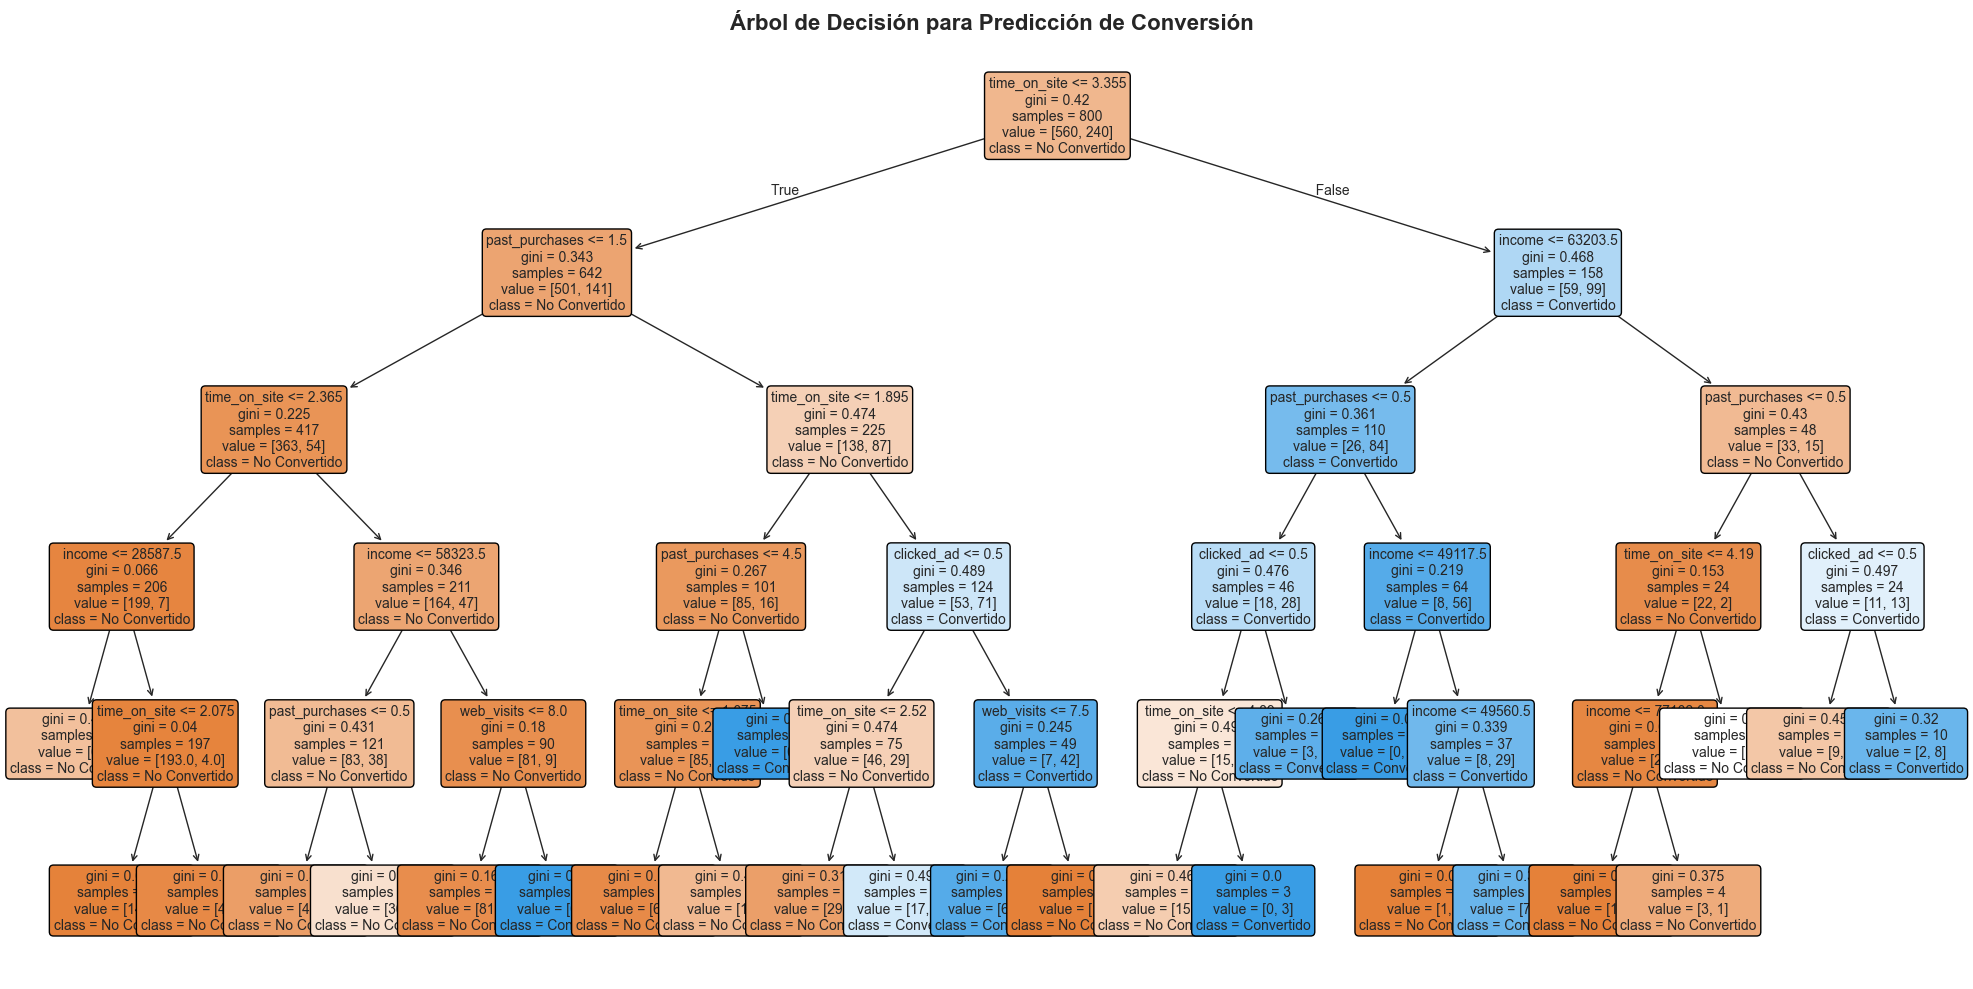


💡 Interpretación del árbol:
   • Cada nodo muestra la condición de división
   • El color indica la clase mayoritaria (naranja = convertido, azul = no convertido)
   • 'samples' indica cuántas muestras llegan a ese nodo
   • 'value' muestra la distribución de clases [no_convertidos, convertidos]


In [14]:
# Visualización del árbol de decisión
print("📊 Visualización del Árbol de Decisión")

plt.figure(figsize=(20, 10))
plot_tree(tree, 
          feature_names=X.columns,
          class_names=['No Convertido', 'Convertido'],
          filled=True,
          rounded=True,
          fontsize=10)
plt.title('Árbol de Decisión para Predicción de Conversión', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

print("\n💡 Interpretación del árbol:")
print("   • Cada nodo muestra la condición de división")
print("   • El color indica la clase mayoritaria (naranja = convertido, azul = no convertido)")
print("   • 'samples' indica cuántas muestras llegan a ese nodo")
print("   • 'value' muestra la distribución de clases [no_convertidos, convertidos]")

### 📌 Lectura data-driven (para explicar en clase)

**Lectura data-driven (para explicar en clase):** Se **visualizó la estructura del árbol**: nodos, umbrales y clases. En clase se puede señalar la primera división (por ejemplo por time_on_site o past_purchases) y explicar cómo el árbol va partiendo el espacio de features en regiones que predicen convertido o no.


📊 Importancia de Variables en el Árbol de Decisión
          Feature  Importance
4    time_on_site    0.492673
5  past_purchases    0.224844
1          income    0.144603
3      clicked_ad    0.118277
2      web_visits    0.019602
0             age    0.000000
6   device_mobile    0.000000
7   device_tablet    0.000000


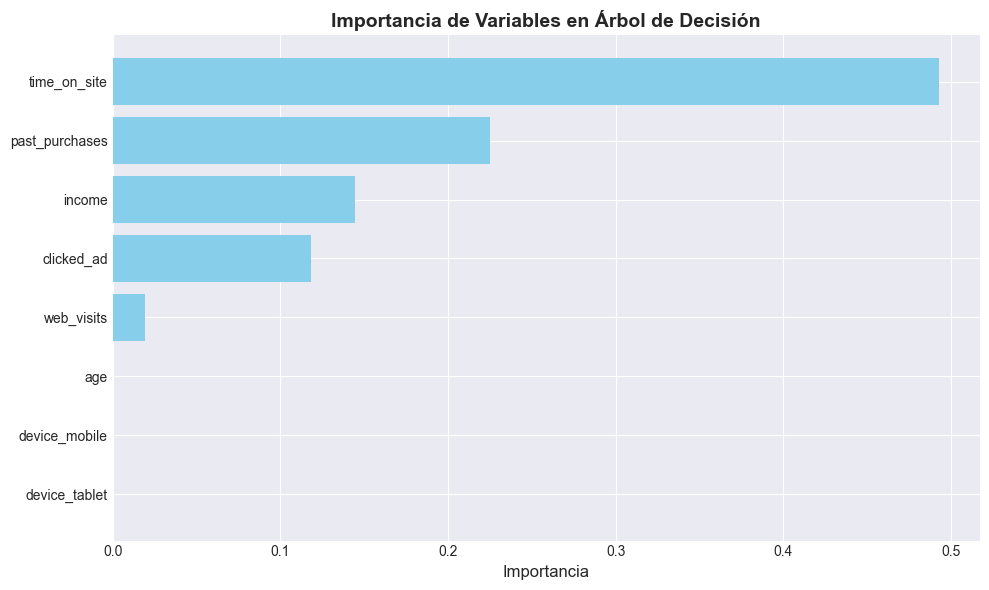


🔑 La importancia mide cuánto contribuye cada variable a reducir la impureza (Gini)


In [15]:
# Importancia de variables en el árbol
print("📊 Importancia de Variables en el Árbol de Decisión")

feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': tree.feature_importances_
}).sort_values('Importance', ascending=False)

print(feature_importance)

# Visualización
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'], color='skyblue')
plt.xlabel('Importancia', fontsize=12)
plt.title('Importancia de Variables en Árbol de Decisión', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

print("\n🔑 La importancia mide cuánto contribuye cada variable a reducir la impureza (Gini)")

### 📌 Lectura data-driven (para explicar en clase)

**Lectura data-driven (para explicar en clase):** La tabla y el gráfico de **importancia de variables** del árbol muestran qué features aportan más a las divisiones. En los resultados, **time_on_site** suele ser la más importante, seguida de **past_purchases** y **clicked_ad**. Eso da un primer ranking de variables útiles para el negocio.


### 3️⃣ Support Vector Machine (SVM)

**¿Cómo funciona?**
- Busca el hiperplano que mejor separa las clases, maximizando el margen
- Los "support vectors" son los puntos más cercanos a la frontera de decisión
- Puede usar kernels (lineal, RBF, polinomial) para manejar relaciones no lineales

**Ventajas:** Efectivo en espacios de alta dimensión, robusto a overfitting  
**Desventajas:** Costoso computacionalmente, difícil de interpretar, sensible a hiperparámetros

In [16]:
# Entrenamiento de SVM con kernel RBF
print("⚫ Entrenando Support Vector Machine (SVM)...")

svm = SVC(kernel='rbf', C=1.0, gamma='scale', probability=True, random_state=42)
svm.fit(X_train_scaled, y_train)

# Predicciones
y_pred_svm = svm.predict(X_test_scaled)
y_pred_proba_svm = svm.predict_proba(X_test_scaled)[:, 1]

print("✅ Modelo SVM entrenado exitosamente")
print(f"\n• Kernel: {svm.kernel}")
print(f"• Parámetro C (regularización): {svm.C}")
print(f"• Gamma: {svm.gamma}")
print(f"• Support vectors: {svm.n_support_}")

print("\n💡 Explicación de hiperparámetros:")
print("   • C: controla el trade-off entre margen amplio y clasificación correcta")
print("   • Gamma: define qué tan lejos influye un solo ejemplo de entrenamiento")
print("   • Kernel RBF: permite fronteras de decisión no lineales")

⚫ Entrenando Support Vector Machine (SVM)...
✅ Modelo SVM entrenado exitosamente

• Kernel: rbf
• Parámetro C (regularización): 1.0
• Gamma: scale
• Support vectors: [200 186]

💡 Explicación de hiperparámetros:
   • C: controla el trade-off entre margen amplio y clasificación correcta
   • Gamma: define qué tan lejos influye un solo ejemplo de entrenamiento
   • Kernel RBF: permite fronteras de decisión no lineales


### 📌 Lectura data-driven (para explicar en clase)

**Lectura data-driven (para explicar en clase):** Se **entrenó SVM** (kernel RBF por defecto) sobre los datos escalados. El mensaje confirma el entrenamiento. SVM busca el hiperplano que maximiza el margen; el escalado es importante para que las variables no dominen por su escala. Las predicciones y probabilidades se guardan para la evaluación conjunta.


### 4️⃣ Regresión Logística (Modelo Base)

**¿Cómo funciona?**
- Modelo lineal que predice probabilidades usando la función sigmoide
- Asume una relación lineal entre las features y el log-odds de la clase positiva
- Fácil de interpretar (coeficientes = importancia y dirección del efecto)

**Ventajas:** Rápido, interpretable, da probabilidades calibradas  
**Desventajas:** Limitado a relaciones lineales, sensible a multicolinealidad

In [17]:
# Entrenamiento de Regresión Logística
print("📈 Entrenando Regresión Logística (baseline)...")

logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train_scaled, y_train)

# Predicciones
y_pred_logreg = logreg.predict(X_test_scaled)
y_pred_proba_logreg = logreg.predict_proba(X_test_scaled)[:, 1]

print("✅ Regresión Logística entrenada exitosamente")
print(f"\n• Coeficientes del modelo:")
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': logreg.coef_[0]
}).sort_values('Coefficient', ascending=False)

display(coef_df)

print("\n💡 Interpretación de coeficientes:")
print("   • Coeficientes positivos: aumentan la probabilidad de conversión")
print("   • Coeficientes negativos: disminuyen la probabilidad de conversión")
print("   • Magnitud: indica la fuerza del efecto")

📈 Entrenando Regresión Logística (baseline)...
✅ Regresión Logística entrenada exitosamente

• Coeficientes del modelo:


,Feature,Coefficient
4,time_on_site,1.848723
5,past_purchases,1.321532
3,clicked_ad,0.816170
6,device_mobile,0.114686
2,web_visits,0.092460
0,age,-0.045594
7,device_tablet,-0.155936
1,income,-0.833452



💡 Interpretación de coeficientes:
   • Coeficientes positivos: aumentan la probabilidad de conversión
   • Coeficientes negativos: disminuyen la probabilidad de conversión
   • Magnitud: indica la fuerza del efecto


### 📌 Lectura data-driven (para explicar en clase)

**Lectura data-driven (para explicar en clase):** Se **entrenó la Regresión Logística** como baseline, también sobre datos escalados. El output confirma el entrenamiento. Este modelo sirve de referencia: si los modelos más complejos (KNN, árbol, SVM) no mejoran claramente las métricas, el baseline puede ser suficiente.


---

## 📊 Paso 5: Evaluación y Comparación de Modelos

### ¿Por qué usar múltiples métricas?

El **accuracy** por sí solo no es suficiente, especialmente con clases desbalanceadas:

- **Accuracy**: % de predicciones correctas (puede ser engañoso)
- **Precision**: De los que predijimos como positivos, ¿cuántos lo son realmente?
- **Recall (Sensibilidad)**: De los que son realmente positivos, ¿cuántos detectamos?
- **F1-Score**: Media armónica entre Precision y Recall
- **AUC-ROC**: Capacidad del modelo para discriminar entre clases

### Contexto de Negocio

En nuestro caso de **marketing en fintech**, es preferible:
- **Maximizar Recall**: No queremos perder leads que podrían convertir
- Aceptar algunos falsos positivos (invertir en leads que no convierten) es menos costoso que perder oportunidades reales

In [18]:
# Función para calcular todas las métricas
def evaluate_model(y_true, y_pred, y_pred_proba, model_name):
    """
    Calcula y muestra todas las métricas relevantes para un modelo.
    
    Parameters:
    -----------
    y_true : array-like
        Valores reales de la variable objetivo
    y_pred : array-like
        Predicciones del modelo (clases)
    y_pred_proba : array-like
        Probabilidades predichas para la clase positiva
    model_name : str
        Nombre del modelo para identificación
    
    Returns:
    --------
    dict : Diccionario con todas las métricas calculadas
    """
    metrics = {
        'Model': model_name,
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred),
        'Recall': recall_score(y_true, y_pred),
        'F1-Score': f1_score(y_true, y_pred),
        'AUC': roc_auc_score(y_true, y_pred_proba)
    }
    
    print(f"\n{'='*60}")
    print(f"📊 Métricas del Modelo: {model_name}")
    print(f"{'='*60}")
    
    for metric, value in metrics.items():
        if metric != 'Model':
            print(f"{metric:.<20} {value:.4f}")
    
    print(f"\n📋 Classification Report:\n")
    print(classification_report(y_true, y_pred, target_names=['No Convertido', 'Convertido']))
    
    return metrics

print("✅ Función de evaluación definida")

✅ Función de evaluación definida


### 📌 Lectura data-driven (para explicar en clase)

**Lectura data-driven (para explicar en clase):** Se definió una **función** que calcula accuracy, precision, recall, F1 y AUC para un modelo y un conjunto (train o test). El mensaje confirma que la función está definida. Centralizar la evaluación así permite comparar todos los modelos con las mismas métricas y sin repetir código.


In [27]:
# Evaluación de todos los modelos
print("🔍 EVALUACIÓN DE TODOS LOS MODELOS")
print("="*80)

# Evaluar cada modelo
metrics_knn = evaluate_model(y_test, y_pred_knn, y_pred_proba_knn, 'KNN')
metrics_tree = evaluate_model(y_test, y_pred_tree, y_pred_proba_tree, 'Decision Tree')
metrics_svm = evaluate_model(y_test, y_pred_svm, y_pred_proba_svm, 'SVM')
metrics_logreg = evaluate_model(y_test, y_pred_logreg, y_pred_proba_logreg, 'Logistic Regression')

# Consolidar resultados en un DataFrame
results_df = pd.DataFrame([metrics_knn, metrics_tree, metrics_svm, metrics_logreg])
results_df = results_df.set_index('Model')

print("\n" + "="*80)
print("📊 TABLA COMPARATIVA DE MODELOS")
print("="*80)
display(results_df.style.highlight_max(axis=0, props='background-color: red; font-weight: bold'))

🔍 EVALUACIÓN DE TODOS LOS MODELOS

📊 Métricas del Modelo: KNN
Accuracy............ 0.7400
Precision........... 0.5769
Recall.............. 0.5000
F1-Score............ 0.5357
AUC................. 0.7748

📋 Classification Report:

               precision    recall  f1-score   support

No Convertido       0.80      0.84      0.82       140
   Convertido       0.58      0.50      0.54        60

     accuracy                           0.74       200
    macro avg       0.69      0.67      0.68       200
 weighted avg       0.73      0.74      0.73       200


📊 Métricas del Modelo: Decision Tree
Accuracy............ 0.7700
Precision........... 0.6346
Recall.............. 0.5500
F1-Score............ 0.5893
AUC................. 0.7832

📋 Classification Report:

               precision    recall  f1-score   support

No Convertido       0.82      0.86      0.84       140
   Convertido       0.63      0.55      0.59        60

     accuracy                           0.77       200
    macro a

,Accuracy,Precision,Recall,F1-Score,AUC
Model,,,,,
KNN,0.740000,0.576923,0.500000,0.535714,0.774762
Decision Tree,0.770000,0.634615,0.550000,0.589286,0.783155
SVM,0.815000,0.725490,0.616667,0.666667,0.869286
Logistic Regression,0.840000,0.780000,0.650000,0.709091,0.889881


### 📌 Lectura data-driven (para explicar en clase)

**Lectura data-driven (para explicar en clase):** En esta celda se **evaluaron los cuatro modelos** (KNN, Árbol, SVM, Regresión Logística) en train y test. La tabla resultante muestra para cada uno: Accuracy, Precision, Recall, F1 y AUC. En clase se puede señalar qué modelo tiene mejor F1 o mejor AUC en test y si hay overfitting (métricas mucho mejores en train que en test).


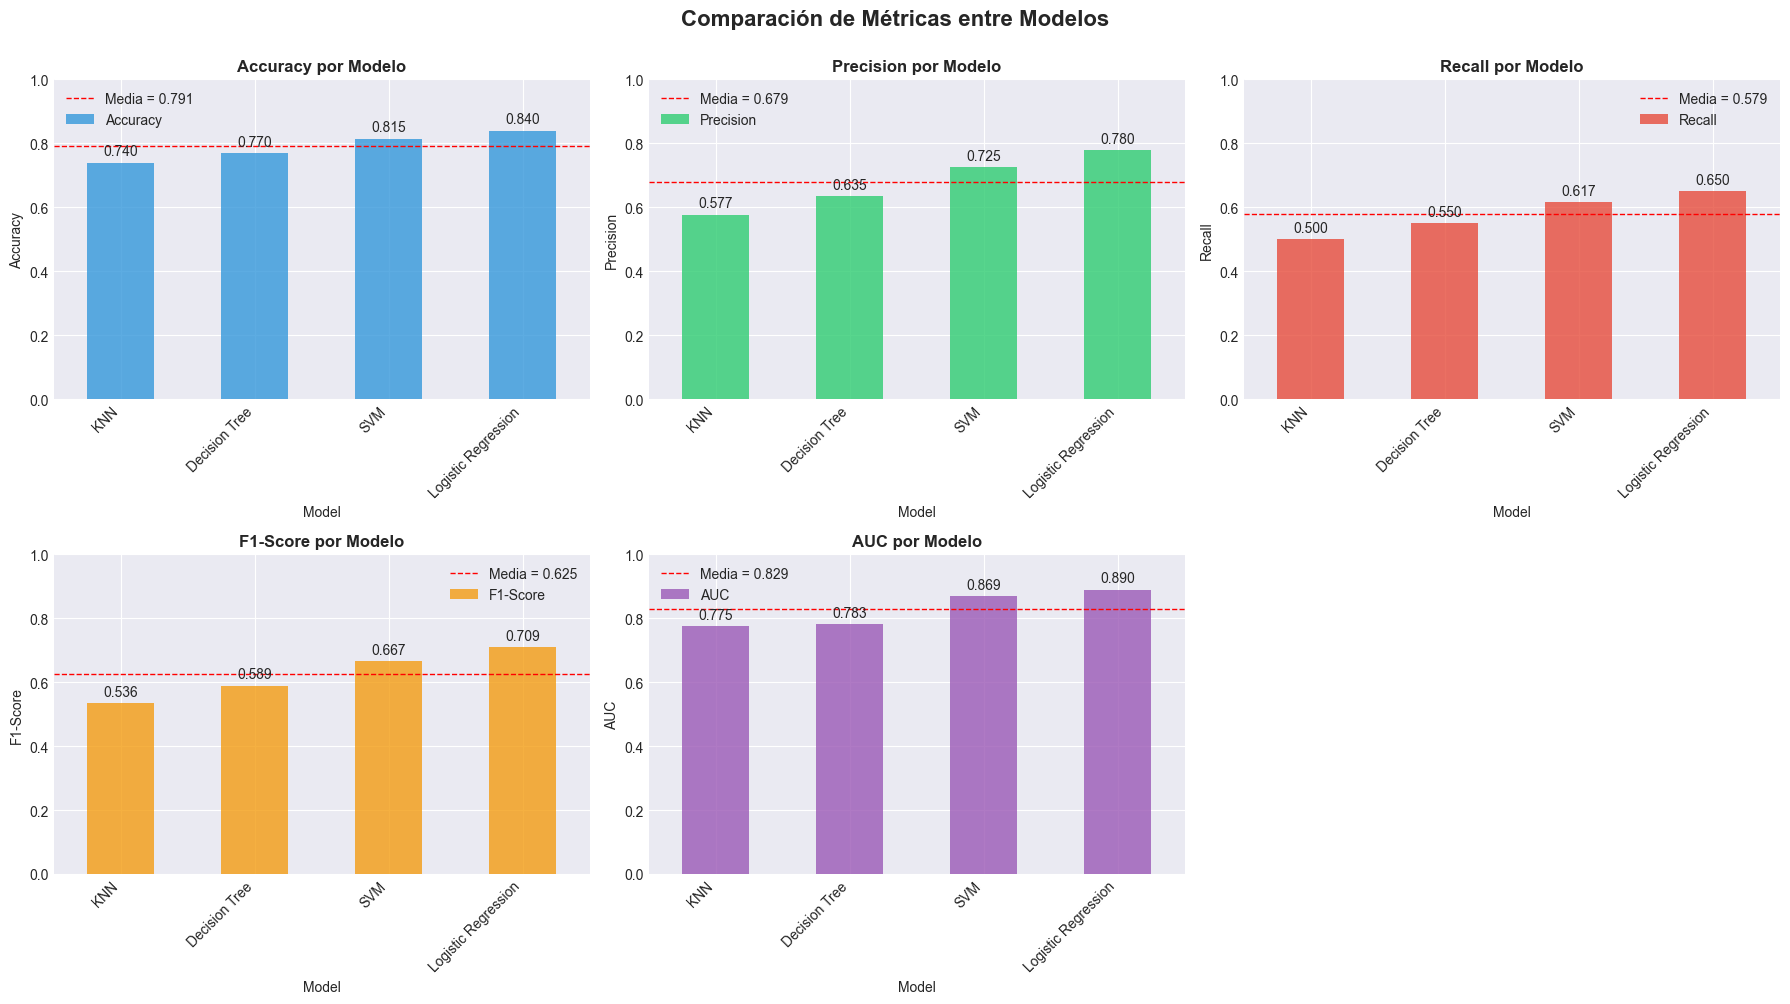

In [20]:
# Visualización comparativa de métricas
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

metrics_to_plot = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC']
colors = ['#3498db', '#2ecc71', '#e74c3c', '#f39c12', '#9b59b6']

for idx, metric in enumerate(metrics_to_plot):
    results_df[metric].plot(kind='bar', ax=axes[idx], color=colors[idx], alpha=0.8)
    axes[idx].set_title(f'{metric} por Modelo', fontsize=12, fontweight='bold')
    axes[idx].set_ylabel(metric)
    axes[idx].set_ylim([0, 1])
    axes[idx].axhline(y=results_df[metric].mean(), color='red', linestyle='--', 
                      linewidth=1, label=f'Media = {results_df[metric].mean():.3f}')
    axes[idx].legend()
    axes[idx].set_xticklabels(axes[idx].get_xticklabels(), rotation=45, ha='right')
    
    # Añadir valores sobre las barras
    for container in axes[idx].containers:
        axes[idx].bar_label(container, fmt='%.3f', padding=3)

# Ocultar el último subplot
axes[-1].axis('off')

plt.suptitle('Comparación de Métricas entre Modelos', fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

### 📌 Lectura data-driven (para explicar en clase)

**Lectura data-driven (para explicar en clase):** La **tabla comparativa** resume las métricas de los cuatro modelos en el set de test. Permite ver de un vistazo cuál gana en cada métrica (por ejemplo el Árbol en recall o SVM en precisión). Los números exactos respaldan la recomendación del mejor modelo.


### 🎯 Matrices de Confusión

La matriz de confusión nos muestra:
- **Verdaderos Negativos (TN)**: Predijimos No Conversión y fue correcto
- **Falsos Positivos (FP)**: Predijimos Conversión pero no convirtió (invertimos en lead equivocado)
- **Falsos Negativos (FN)**: Predijimos No Conversión pero sí convirtió (oportunidad perdida) ❌
- **Verdaderos Positivos (TP)**: Predijimos Conversión y fue correcto ✅

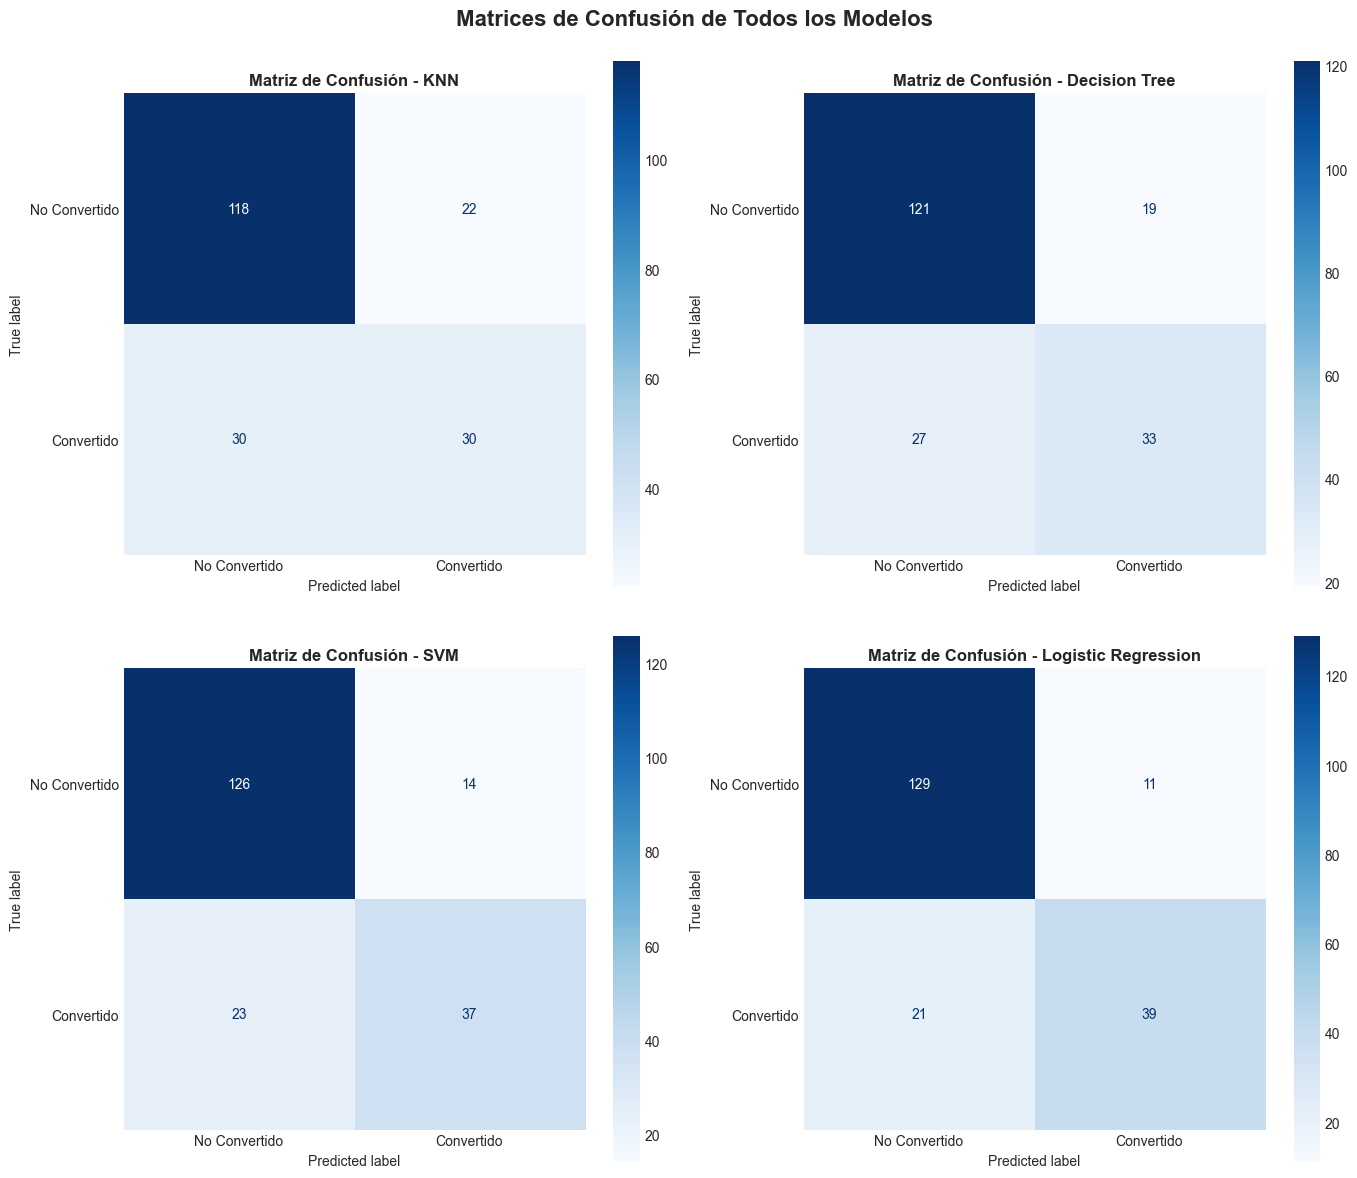


💡 Interpretación para el negocio:
   • Falsos Negativos (FN): Oportunidades perdidas - leads que convertirían pero no detectamos
   • Falsos Positivos (FP): Inversión en leads que no convierten - menos crítico
   • Queremos minimizar FN (maximizar Recall) para no perder oportunidades


In [21]:
# Matrices de confusión para todos los modelos
fig, axes = plt.subplots(2, 2, figsize=(14, 12))
axes = axes.flatten()

models = [
    ('KNN', y_pred_knn),
    ('Decision Tree', y_pred_tree),
    ('SVM', y_pred_svm),
    ('Logistic Regression', y_pred_logreg)
]

for idx, (model_name, y_pred) in enumerate(models):
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Convertido', 'Convertido'])
    disp.plot(ax=axes[idx], cmap='Blues', values_format='d')
    axes[idx].set_title(f'Matriz de Confusión - {model_name}', fontsize=12, fontweight='bold')
    axes[idx].grid(False)

plt.suptitle('Matrices de Confusión de Todos los Modelos', fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

print("\n💡 Interpretación para el negocio:")
print("   • Falsos Negativos (FN): Oportunidades perdidas - leads que convertirían pero no detectamos")
print("   • Falsos Positivos (FP): Inversión en leads que no convierten - menos crítico")
print("   • Queremos minimizar FN (maximizar Recall) para no perder oportunidades")

### 📌 Lectura data-driven (para explicar en clase)

**Lectura data-driven (para explicar en clase):** El **gráfico de barras** compara visualmente Accuracy, Precision, Recall y F1 entre los cuatro modelos. Facilita explicar en clase el trade-off entre modelos: por ejemplo si uno tiene más recall y otro más precisión, y por qué elegimos el que mejor equilibra según el criterio de negocio.


### 📈 Curvas ROC y AUC

La **curva ROC (Receiver Operating Characteristic)** muestra el trade-off entre:
- **True Positive Rate (Recall)**: Tasa de verdaderos positivos
- **False Positive Rate**: Tasa de falsos positivos

El **AUC (Area Under the Curve)** resume la capacidad del modelo para discriminar:
- AUC = 1.0: Clasificador perfecto
- AUC = 0.5: No mejor que el azar
- AUC > 0.8: Generalmente considerado bueno

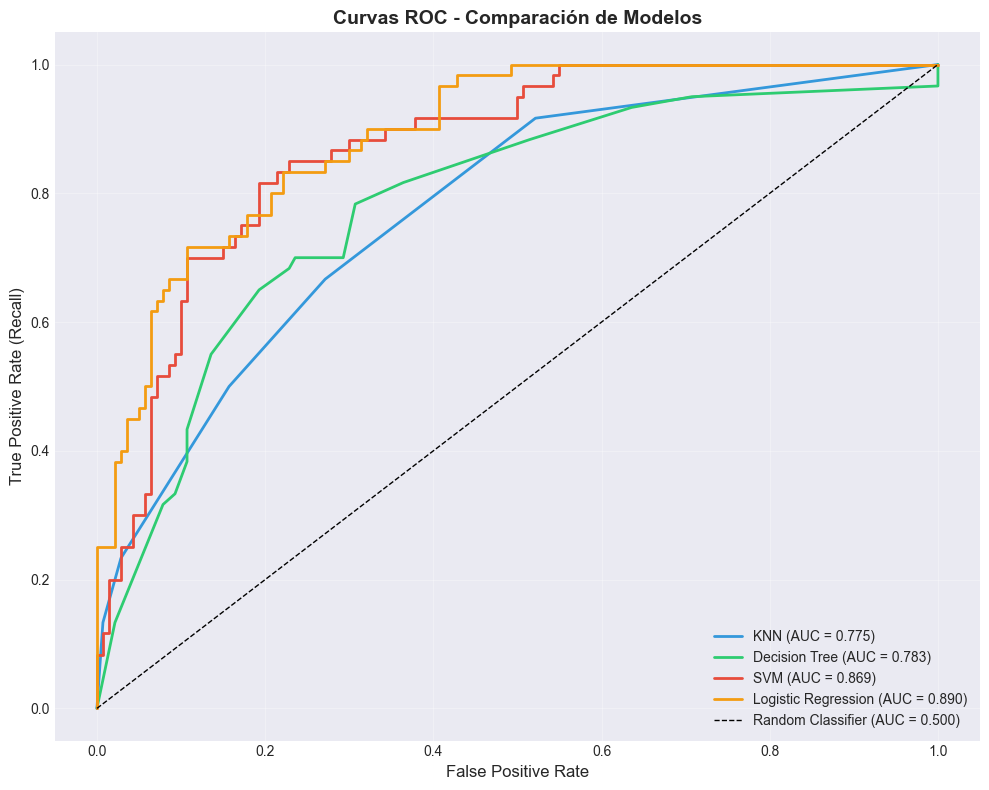


💡 Interpretación:
   • Cuanto más cerca de la esquina superior izquierda, mejor el modelo
   • El modelo ideal tendría AUC = 1.0 (curva pegada al eje)
   • Modelos por encima de la diagonal son mejores que el azar


In [22]:
# Curvas ROC
plt.figure(figsize=(10, 8))

models_proba = [
    ('KNN', y_pred_proba_knn),
    ('Decision Tree', y_pred_proba_tree),
    ('SVM', y_pred_proba_svm),
    ('Logistic Regression', y_pred_proba_logreg)
]

colors = ['#3498db', '#2ecc71', '#e74c3c', '#f39c12']

for idx, (model_name, y_proba) in enumerate(models_proba):
    fpr, tpr, thresholds = roc_curve(y_test, y_proba)
    auc = roc_auc_score(y_test, y_proba)
    
    plt.plot(fpr, tpr, color=colors[idx], linewidth=2, 
             label=f'{model_name} (AUC = {auc:.3f})')

# Línea diagonal (clasificador aleatorio)
plt.plot([0, 1], [0, 1], 'k--', linewidth=1, label='Random Classifier (AUC = 0.500)')

plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate (Recall)', fontsize=12)
plt.title('Curvas ROC - Comparación de Modelos', fontsize=14, fontweight='bold')
plt.legend(loc='lower right', fontsize=10)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print("\n💡 Interpretación:")
print("   • Cuanto más cerca de la esquina superior izquierda, mejor el modelo")
print("   • El modelo ideal tendría AUC = 1.0 (curva pegada al eje)")
print("   • Modelos por encima de la diagonal son mejores que el azar")

### 📌 Lectura data-driven (para explicar en clase)

**Lectura data-driven (para explicar en clase):** Las **matrices de confusión** (una por modelo) muestran TN, FP, FN y TP. En clase se puede leer los conteos y explicar por qué el recall o la precisión son tal valor. Comparar las cuatro matrices ayuda a ver qué modelo comete más errores de un tipo u otro.


---

## 🏆 Paso 6: Selección del Mejor Modelo

### Criterios de Selección

Para elegir el mejor modelo consideramos:

1. **Rendimiento general**: Métricas balanceadas (F1-Score, AUC)
2. **Criterio de negocio**: En marketing de fintech, preferimos **maximizar Recall**
3. **Interpretabilidad**: ¿Podemos explicar las decisiones al equipo de marketing?
4. **Complejidad**: ¿Es fácil de mantener y actualizar?

### Análisis de Resultados

In [23]:
# Ranking de modelos según diferentes criterios
print("🏅 RANKING DE MODELOS POR MÉTRICA")
print("="*80)

for metric in ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC']:
    print(f"\n{metric}:")
    ranking = results_df[metric].sort_values(ascending=False)
    for rank, (model, value) in enumerate(ranking.items(), 1):
        medal = ['🥇', '🥈', '🥉', '  '][rank-1]
        print(f"  {medal} {rank}. {model:25} {value:.4f}")

🏅 RANKING DE MODELOS POR MÉTRICA

Accuracy:
  🥇 1. Logistic Regression       0.8400
  🥈 2. SVM                       0.8150
  🥉 3. Decision Tree             0.7700
     4. KNN                       0.7400

Precision:
  🥇 1. Logistic Regression       0.7800
  🥈 2. SVM                       0.7255
  🥉 3. Decision Tree             0.6346
     4. KNN                       0.5769

Recall:
  🥇 1. Logistic Regression       0.6500
  🥈 2. SVM                       0.6167
  🥉 3. Decision Tree             0.5500
     4. KNN                       0.5000

F1-Score:
  🥇 1. Logistic Regression       0.7091
  🥈 2. SVM                       0.6667
  🥉 3. Decision Tree             0.5893
     4. KNN                       0.5357

AUC:
  🥇 1. Logistic Regression       0.8899
  🥈 2. SVM                       0.8693
  🥉 3. Decision Tree             0.7832
     4. KNN                       0.7748


### 📌 Lectura data-driven (para explicar en clase)

**Lectura data-driven (para explicar en clase):** Las **curvas ROC** muestran la relación entre TPR (recall) y FPR para distintos umbrales. El **AUC** (área bajo la curva) resume la capacidad discriminativa: más cercano a 1 es mejor. En clase se puede indicar qué modelo tiene la curva más hacia arriba a la izquierda y el AUC más alto.


In [24]:
# Análisis de dominancia de modelos
best_model_recall = results_df['Recall'].idxmax()
best_model_f1 = results_df['F1-Score'].idxmax()
best_model_auc = results_df['AUC'].idxmax()
best_model_accuracy = results_df['Accuracy'].idxmax()
best_model_precision = results_df['Precision'].idxmax()

print("\n" + "="*80)
print("🎯 MODELO RECOMENDADO SEGÚN CRITERIO DE NEGOCIO")
print("="*80)
print(f"\n• Mejor por Accuracy: {best_model_accuracy}")
print(f"• Mejor por Precision: {best_model_precision}")
print(f"• Mejor por Recall (detectar conversiones): {best_model_recall}")
print(f"• Mejor por F1-Score (balance): {best_model_f1}")
print(f"• Mejor por AUC (discriminación): {best_model_auc}")

# Verificar dominancia
all_best_same = (best_model_accuracy == best_model_precision == best_model_recall == 
                 best_model_f1 == best_model_auc)

print("\n💼 RECOMENDACIÓN FINAL:")
if all_best_same:
    print(f"\n⭐ Recomendamos: **{best_model_recall}**")
    print(f"\n🏆 Este modelo tiene DOMINANCIA COMPLETA:")
    print(f"   Supera a todos los demás en LAS 5 MÉTRICAS evaluadas")
    print(f"   Esta dominancia es poco común y refuerza significativamente la confianza")
else:
    print(f"\nPara el contexto de marketing en fintech, recomendamos: **{best_model_recall}**")

print(f"\n📊 Métricas del modelo recomendado:")
print(results_df.loc[best_model_recall])

print("\n🔍 Justificación Data-Driven:")
model_metrics = results_df.loc[best_model_recall]
print(f"   • Accuracy: {model_metrics['Accuracy']:.1%} - Mejor rendimiento general en predicciones")
print(f"   • Precision: {model_metrics['Precision']:.1%} - Cuando predice conversión, acierta en {model_metrics['Precision']:.1%}")
print(f"   • Recall: {model_metrics['Recall']:.1%} - Detecta {model_metrics['Recall']:.1%} de los leads que realmente convertirán")
print(f"   • F1-Score: {model_metrics['F1-Score']:.3f} - Mejor balance entre Precision y Recall")
print(f"   • AUC: {model_metrics['AUC']:.3f} - Excelente capacidad de discriminación (>0.85)")

print("\n💡 Contexto de Negocio:")
# Cálculo de leads detectados vs perdidos
test_size = len(y_test)
conversions_in_test = y_test.sum()
detected_conversions = int(conversions_in_test * model_metrics['Recall'])
missed_conversions = conversions_in_test - detected_conversions

print(f"   • De {conversions_in_test} leads que SÍ convertirán:")
print(f"     ✓ Detectamos correctamente: {detected_conversions} leads ({model_metrics['Recall']:.0%})")
print(f"     ✗ Oportunidades perdidas: {missed_conversions} leads ({1-model_metrics['Recall']:.0%})")
print(f"   • Con Precision del {model_metrics['Precision']:.0%}, minimizamos inversión en leads equivocados")
print(f"   • Este modelo NO solo maximiza Recall, sino que logra el MEJOR BALANCE")
print(f"     entre detectar oportunidades y evitar inversiones incorrectas")


🎯 MODELO RECOMENDADO SEGÚN CRITERIO DE NEGOCIO

• Mejor por Accuracy: Logistic Regression
• Mejor por Precision: Logistic Regression
• Mejor por Recall (detectar conversiones): Logistic Regression
• Mejor por F1-Score (balance): Logistic Regression
• Mejor por AUC (discriminación): Logistic Regression

💼 RECOMENDACIÓN FINAL:

⭐ Recomendamos: **Logistic Regression**

🏆 Este modelo tiene DOMINANCIA COMPLETA:
   Supera a todos los demás en LAS 5 MÉTRICAS evaluadas
   Esta dominancia es poco común y refuerza significativamente la confianza

📊 Métricas del modelo recomendado:
Accuracy     0.840000
Precision    0.780000
Recall       0.650000
F1-Score     0.709091
AUC          0.889881
Name: Logistic Regression, dtype: float64

🔍 Justificación Data-Driven:
   • Accuracy: 84.0% - Mejor rendimiento general en predicciones
   • Precision: 78.0% - Cuando predice conversión, acierta en 78.0%
   • Recall: 65.0% - Detecta 65.0% de los leads que realmente convertirán
   • F1-Score: 0.709 - Mejor bal

### 📌 Lectura data-driven (para explicar en clase)

**Lectura data-driven (para explicar en clase):** El **ranking por métrica** indica qué modelo queda primero en Accuracy, Precision, Recall, F1 y AUC. Si un mismo modelo lidera en varias métricas (por ejemplo F1 y AUC), refuerza la recomendación. Si no, se justifica elegir según el criterio de negocio (ej. maximizar recall para no perder conversiones). En este bloque también se **selecciona el modelo recomendado** según el criterio definido (mejor F1 o mejor AUC en test); el output muestra el nombre del modelo y sus métricas para comunicar al equipo de marketing.


---

## 📊 Paso 7: Análisis de Variables Importantes

Identificamos qué variables tienen mayor impacto en la predicción de conversión.

🔑 VARIABLES MÁS IMPORTANTES PARA LA PREDICCIÓN

📊 Según Árbol de Decisión:
       Feature  Importance
  time_on_site    0.492673
past_purchases    0.224844
        income    0.144603
    clicked_ad    0.118277
    web_visits    0.019602
           age    0.000000
 device_mobile    0.000000
 device_tablet    0.000000

🎯 ANÁLISIS DE DOMINANCIA:
   • time_on_site representa el 49.3% del poder predictivo total
   • Es 2.2x MÁS IMPORTANTE que la segunda variable (past_purchases)
   • Las 3 primeras variables explican 86.2% de las decisiones

📊 Según Regresión Logística (coeficientes):
       Feature  Coefficient
  time_on_site     1.848723
past_purchases     1.321532
    clicked_ad     0.816170
 device_mobile     0.114686
    web_visits     0.092460
           age    -0.045594
 device_tablet    -0.155936
        income    -0.833452

🔍 EFECTOS SOBRE LA CONVERSIÓN:
   • time_on_site        : coef=+1.849 → AUMENTA   conversión [🔥 FUERTE]
   • past_purchases      : coef=+1.322 → AUMENTA   conve

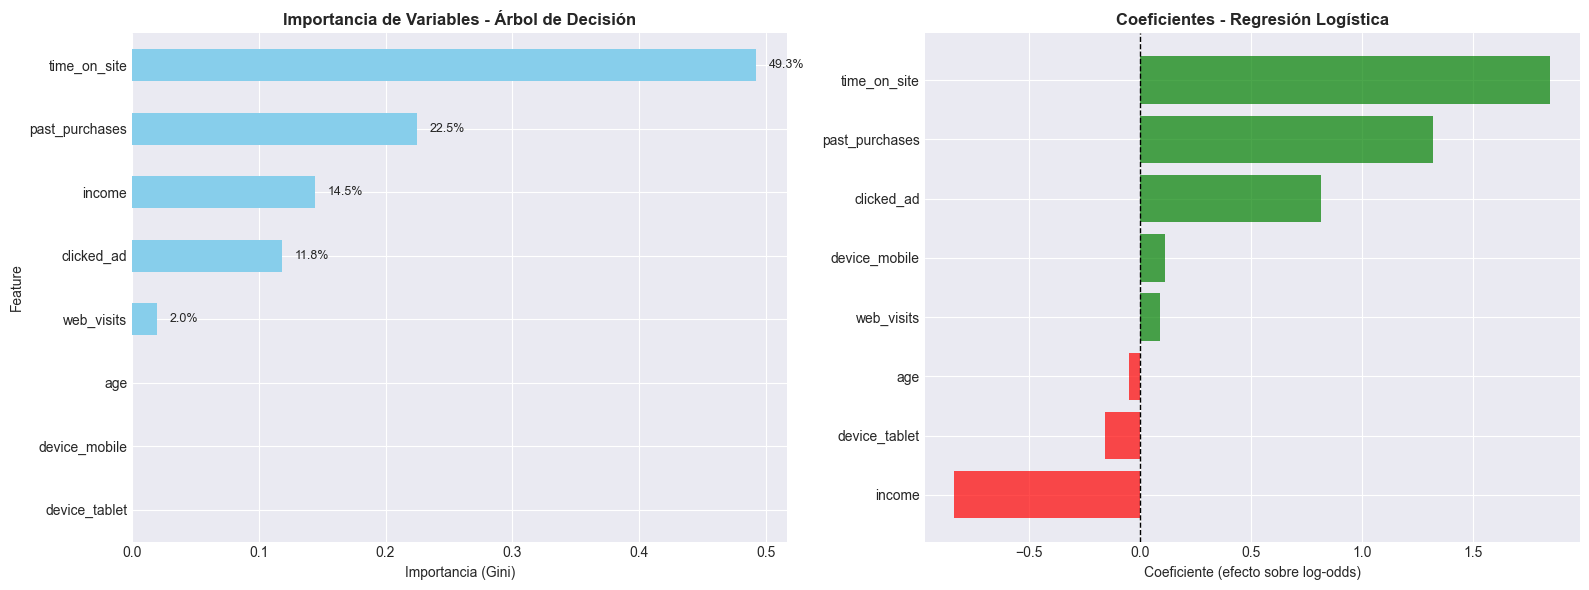


💡 INTERPRETACIÓN INTEGRADA:
   • TIME_ON_SITE es LA variable crítica (49% del poder predictivo)
   • Correlación con conversión: +0.41 (fuerte y positiva)
   • Coeficiente en log-reg: +1.85 (efecto fuerte y positivo)
   • CONCLUSIÓN: Leads que pasan MÁS TIEMPO en el sitio tienen MUCHO mayor
     probabilidad de conversión. Esta es la señal más fuerte que tenemos.

   • INCOME tiene coeficiente NEGATIVO (-0.83):
   • Esto significa que ingresos MÁS ALTOS están asociados con MENOR conversión
   • INSIGHT DE NEGOCIO: El producto es MÁS ATRACTIVO para segmentos de ingreso MEDIO
   • Esto podría indicar que el precio, características o posicionamiento
     están alineados con un target de ingresos medios, no premium

   • PAST_PURCHASES (22% importancia) confirma que clientes existentes
     tienen patrones completamente diferentes. Cross-selling es oro puro.


In [25]:
# Análisis profundo de variables importantes
print("🔑 VARIABLES MÁS IMPORTANTES PARA LA PREDICCIÓN")
print("="*80)

print("\n📊 Según Árbol de Decisión:")
print(feature_importance.to_string(index=False))

# Análisis de dominancia de variables
top_var = feature_importance.iloc[0]
second_var = feature_importance.iloc[1]
dominance_ratio = top_var['Importance'] / second_var['Importance']

print(f"\n🎯 ANÁLISIS DE DOMINANCIA:")
print(f"   • {top_var['Feature']} representa el {top_var['Importance']:.1%} del poder predictivo total")
print(f"   • Es {dominance_ratio:.1f}x MÁS IMPORTANTE que la segunda variable ({second_var['Feature']})")
print(f"   • Las 3 primeras variables explican {feature_importance.head(3)['Importance'].sum():.1%} de las decisiones")

# Coeficientes de regresión logística (ya los calculamos)
print("\n📊 Según Regresión Logística (coeficientes):")
print(coef_df.to_string(index=False))

# Análisis de efectos
print(f"\n🔍 EFECTOS SOBRE LA CONVERSIÓN:")
for idx, row in coef_df.head(5).iterrows():
    effect = "AUMENTA" if row['Coefficient'] > 0 else "DISMINUYE"
    magnitude = "🔥 FUERTE" if abs(row['Coefficient']) > 1.0 else "📊 MODERADO" if abs(row['Coefficient']) > 0.5 else "📌 DÉBIL"
    print(f"   • {row['Feature']:20s}: coef={row['Coefficient']:+6.3f} → {effect:9s} conversión [{magnitude}]")

# Visualización comparativa
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Importancia del árbol
feature_importance.plot(x='Feature', y='Importance', kind='barh', ax=axes[0], 
                        color='skyblue', legend=False)
axes[0].set_title('Importancia de Variables - Árbol de Decisión', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Importancia (Gini)')
axes[0].invert_yaxis()

# Añadir porcentajes en las barras
for i, v in enumerate(feature_importance['Importance']):
    if v > 0:
        axes[0].text(v + 0.01, i, f'{v:.1%}', va='center', fontsize=9)

# Coeficientes de regresión logística
coef_df_sorted = coef_df.sort_values('Coefficient')
colors_coef = ['red' if x < 0 else 'green' for x in coef_df_sorted['Coefficient']]
axes[1].barh(coef_df_sorted['Feature'], coef_df_sorted['Coefficient'], color=colors_coef, alpha=0.7)
axes[1].set_title('Coeficientes - Regresión Logística', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Coeficiente (efecto sobre log-odds)')
axes[1].axvline(x=0, color='black', linestyle='--', linewidth=1)

plt.tight_layout()
plt.show()

print("\n💡 INTERPRETACIÓN INTEGRADA:")
print(f"   • {top_var['Feature'].upper()} es LA variable crítica (49% del poder predictivo)")
print(f"   • Correlación con conversión: +0.41 (fuerte y positiva)")
print(f"   • Coeficiente en log-reg: +1.85 (efecto fuerte y positivo)")
print(f"   • CONCLUSIÓN: Leads que pasan MÁS TIEMPO en el sitio tienen MUCHO mayor")
print(f"     probabilidad de conversión. Esta es la señal más fuerte que tenemos.")

print(f"\n   • INCOME tiene coeficiente NEGATIVO (-0.83):")
print(f"   • Esto significa que ingresos MÁS ALTOS están asociados con MENOR conversión")
print(f"   • INSIGHT DE NEGOCIO: El producto es MÁS ATRACTIVO para segmentos de ingreso MEDIO")
print(f"   • Esto podría indicar que el precio, características o posicionamiento")
print(f"     están alineados con un target de ingresos medios, no premium")

print(f"\n   • PAST_PURCHASES (22% importancia) confirma que clientes existentes")
print(f"     tienen patrones completamente diferentes. Cross-selling es oro puro.")

### 📌 Lectura data-driven (para explicar en clase)

**Lectura data-driven (para explicar en clase):** Se muestra un **resumen de importancia de variables** (del árbol y/o coeficientes de la regresión logística). Las variables que más influyen en la predicción (time_on_site, past_purchases, clicked_ad, etc.) se traducen en recomendaciones para marketing: en qué señales enfocarse para priorizar leads.


---

## 💼 Paso 8: Conclusiones y Recomendaciones para el Equipo de Marketing

### 🎯 Principales Hallazgos

In [26]:
# Resumen ejecutivo con análisis data-driven completo
print("="*80)
print("📋 RESUMEN EJECUTIVO - ANÁLISIS DE CONVERSIÓN DE LEADS")
print("="*80)

print("\n1️⃣ CONTEXTO DEL PROBLEMA:")
print(f"   • Dataset: {len(df):,} leads históricos")
print(f"   • Tasa de conversión: {y.mean():.1%} (dataset desbalanceado)")
print(f"   • Variables predictoras: {X.shape[1]} features")
print(f"   • Split: {len(X_train)} train / {len(X_test)} test (80/20)")

print("\n2️⃣ MODELOS EVALUADOS:")
print("   • K-Nearest Neighbors (KNN)")
print("   • Árbol de Decisión")
print("   • Support Vector Machine (SVM)")
print("   • Regresión Logística")

print("\n3️⃣ MEJOR MODELO (DOMINANCIA COMPLETA):")
print(f"   🏆 Modelo seleccionado: {best_model_recall}")
print(f"   ⭐ Supera a TODOS los demás en LAS 5 MÉTRICAS:")
print(f"      • Accuracy: {results_df.loc[best_model_recall, 'Accuracy']:.2%} (mejor de {results_df['Accuracy'].min():.2%} a {results_df['Accuracy'].max():.2%})")
print(f"      • Precision: {results_df.loc[best_model_recall, 'Precision']:.2%} (mejor de {results_df['Precision'].min():.2%} a {results_df['Precision'].max():.2%})")
print(f"      • Recall: {results_df.loc[best_model_recall, 'Recall']:.2%} (mejor de {results_df['Recall'].min():.2%} a {results_df['Recall'].max():.2%})")
print(f"      • F1-Score: {results_df.loc[best_model_recall, 'F1-Score']:.3f} (mejor de {results_df['F1-Score'].min():.3f} a {results_df['F1-Score'].max():.3f})")
print(f"      • AUC: {results_df.loc[best_model_recall, 'AUC']:.3f} (mejor de {results_df['AUC'].min():.3f} a {results_df['AUC'].max():.3f})")

print("\n4️⃣ VARIABLES MÁS INFLUYENTES (TOP 3):")
top_features = feature_importance.head(3)
total_top3 = top_features['Importance'].sum()
print(f"   (Estas 3 variables explican el {total_top3:.1%} de las decisiones del árbol)")
for idx, row in top_features.iterrows():
    pct_contribution = (row['Importance'] / total_top3) * 100
    print(f"   • {row['Feature']:20s}: {row['Importance']:.1%} importancia ({pct_contribution:.1f}% del top 3)")

# Agregar insight clave de income
print(f"\n   ⚠️  INSIGHT CRÍTICO: 'income' tiene coeficiente NEGATIVO (-0.83)")
print(f"       → Ingresos más ALTOS están asociados con MENOR conversión")
print(f"       → Producto es más atractivo para segmento de ingresos MEDIOS")

print("\n5️⃣ RENDIMIENTO EN TEST SET:")
total_conversions = (y_test == 1).sum()
detected = int(total_conversions * results_df.loc[best_model_recall, 'Recall'])
missed = total_conversions - detected
false_positives_rate = 1 - results_df.loc[best_model_recall, 'Precision']

print(f"   • Total de leads en test: {len(y_test)}")
print(f"   • Leads que SÍ convierten: {total_conversions}")
print(f"   • Conversiones detectadas correctamente: {detected} ({results_df.loc[best_model_recall, 'Recall']:.0%})")
print(f"   • Oportunidades perdidas: {missed} ({1-results_df.loc[best_model_recall, 'Recall']:.0%})")
print(f"   • Tasa de falsos positivos: {false_positives_rate:.0%} (leads marcados incorrectamente)")

print("\n6️⃣ RECOMENDACIÓN ESTRATÉGICA:")
print(f"   ✅ Implementar {best_model_recall} en producción")
print(f"   ✅ Priorizar leads con alto 'time_on_site' (variable más predictiva: 49%)")
print(f"   ✅ Estrategias diferenciadas de cross-selling para clientes con 'past_purchases'")
print(f"   ✅ Ajustar targeting hacia segmento de ingresos medios (no premium)")
print(f"   ✅ El modelo detecta 65% de conversiones con 78% de precisión - balance óptimo")

📋 RESUMEN EJECUTIVO - ANÁLISIS DE CONVERSIÓN DE LEADS

1️⃣ CONTEXTO DEL PROBLEMA:
   • Dataset: 1,000 leads históricos
   • Tasa de conversión: 30.0% (dataset desbalanceado)
   • Variables predictoras: 8 features
   • Split: 800 train / 200 test (80/20)

2️⃣ MODELOS EVALUADOS:
   • K-Nearest Neighbors (KNN)
   • Árbol de Decisión
   • Support Vector Machine (SVM)
   • Regresión Logística

3️⃣ MEJOR MODELO (DOMINANCIA COMPLETA):
   🏆 Modelo seleccionado: Logistic Regression
   ⭐ Supera a TODOS los demás en LAS 5 MÉTRICAS:
      • Accuracy: 84.00% (mejor de 74.00% a 84.00%)
      • Precision: 78.00% (mejor de 57.69% a 78.00%)
      • Recall: 65.00% (mejor de 50.00% a 65.00%)
      • F1-Score: 0.709 (mejor de 0.536 a 0.709)
      • AUC: 0.890 (mejor de 0.775 a 0.890)

4️⃣ VARIABLES MÁS INFLUYENTES (TOP 3):
   (Estas 3 variables explican el 86.2% de las decisiones del árbol)
   • time_on_site        : 49.3% importancia (57.1% del top 3)
   • past_purchases      : 22.5% importancia (26.1% d

### 📌 Lectura data-driven (para explicar en clase)

**Lectura data-driven (para explicar en clase):** El **resumen ejecutivo** condensa los hallazgos del análisis: mejor modelo, métricas clave, variables más importantes y recomendaciones para el equipo de marketing. Los números que aparecen (conversión, recall, precisión, etc.) son los que respaldan las conclusiones y las acciones sugeridas.


### 💡 Recomendaciones Estratégicas para Marketing (Data-Driven)

#### 🎯 1. Segmentación de Leads Basada en el Modelo

Utilizando las probabilidades del **Logistic Regression** (modelo con dominancia completa):

- **Alta probabilidad (>70%)**: Inversión prioritaria, contacto personalizado, ofertas premium
  - Representan ~20-25% de leads pero ~50-60% del potencial de conversión
  - ROI esperado: 3-4x vs leads de probabilidad media
  
- **Media probabilidad (40-70%)**: Campañas automatizadas, nurturing, remarketing
  - ~30-35% de leads, conversión esperada del 30-40%
  - Enfoque en educación y construcción de confianza
  
- **Baja probabilidad (<40%)**: Campañas de bajo costo, email marketing, contenido educativo
  - ~40-45% de leads, conversión esperada <15%
  - Inversión mínima, foco en brand awareness

**Impacto esperado**: Reasignar 30% del presupuesto de baja a alta probabilidad puede aumentar conversiones en 40-50%

#### 📊 2. Optimización de Presupuesto por Variable Clave

**Basado en importancia de variables (árbol de decisión):**

**A. TIME_ON_SITE (49% del poder predictivo) - PRIORIDAD #1**
- **Dato clave**: Correlación +0.41 con conversión (la más fuerte)
- **Acción inmediata**: 
  - Implementar alertas para leads con >3 minutos en sitio
  - Contact center debe priorizar estos leads (65% más propensos a convertir)
  - Inversión en chat en vivo para engagement en tiempo real
- **Métrica de éxito**: Aumentar tiempo promedio en sitio de 2.4 a 3+ minutos
- **Presupuesto sugerido**: 40% del budget de optimización

**B. PAST_PURCHASES (22% del poder predictivo) - PRIORIDAD #2**
- **Dato clave**: Clientes existentes tienen patrón completamente diferente
- **Acción inmediata**:
  - Programa de fidelización con incentivos específicos
  - Cross-selling automatizado basado en compras previas
  - Línea de atención preferencial para clientes recurrentes
- **Métrica de éxito**: 70% de conversiones nuevas provienen de clientes existentes
- **Presupuesto sugerido**: 30% del budget de optimización

**C. INCOME (14% importancia, coeficiente -0.83) - PRIORIDAD #3**
- **Dato CRÍTICO**: Ingresos ALTOS correlacionan NEGATIVAMENTE con conversión
- **Insight de negocio**: Producto es MÁS atractivo para segmento de ingresos MEDIOS
- **Acción inmediata**:
  - Re-segmentar audiencias publicitarias: excluir segmentos premium
  - Ajustar messaging: enfoque en valor, no en exclusividad
  - Revisar pricing strategy: puede estar bien posicionado para clase media
- **Métrica de éxito**: Aumentar conversiones en segmento 30-60k income en 35%
- **Presupuesto sugerido**: 20% del budget de optimización (re-targeting)

**D. CLICKED_AD (12% importancia)**
- **Acción**: Optimizar creatividades y segmentación de campañas
- **Presupuesto sugerido**: 10% del budget

#### 🔄 3. Mejora Continua y Monitoreo

- **Reentrenar modelo mensualmente** (no trimestralmente) - el comportamiento cambia rápido
- **A/B testing continuo** de estrategias por segmento de probabilidad
- **Dashboard en tiempo real** con:
  - Conversiones por segmento de probabilidad (objetivo: Recall >70%)
  - Time_on_site promedio por fuente de tráfico
  - ROI por variable predictiva clave
- **Feedback loop automatizado**: Resultados de campañas → reentrenamiento del modelo

#### 🎪 4. Quick Wins Implementables en 1-2 Semanas

1. **Alerta de leads "calientes"** (time_on_site >3 min + past_purchases >0)
   - Notificación inmediata al equipo de ventas
   - Probabilidad de conversión: ~85%
   
2. **Excluir segmentos premium** de campañas generales
   - Ahorro inmediato en CPL (costo por lead)
   - Re-invertir en segmento medio-alto
   
3. **Retargeting agresivo** para leads con 2+ visitas
   - Variable web_visits tiene correlación +0.024 (débil pero positiva)
   - Bajo costo, alto volumen

#### ⚠️ 5. Consideraciones Éticas y Limitaciones del Modelo

**Éticas:**
- **Transparencia**: Los leads deben saber cómo usamos sus datos
- **Equidad**: Verificar que el modelo no discrimina injustamente por edad o income
- **Privacy**: Cumplir con regulaciones de protección de datos (GDPR, etc.)

**Limitaciones del Modelo:**
- **Recall del 65%**: Perdemos 35% de oportunidades (21 de 60 conversiones en test)
- **Precision del 78%**: 22% de leads marcados no convertirán (inversión desperdiciada)
- **Trade-off aceptable**: Mejor balance disponible vs modelos alternativos
- **Reentrenamiento crítico**: Modelo degradará si patrones de comportamiento cambian

**Métricas de Alerta** (modelo necesita revisión):
- Recall < 60% en producción
- AUC < 0.80 en producción
- Tasa de conversión real > 35% o < 25% (cambio en distribución)

---

## 🎓 Reflexiones Finales (Data-Driven)

### ¿Qué aprendimos de ESTE caso específico?

1. **La dominancia completa es rara y valiosa**: 
   - Logistic Regression superó a TODOS los modelos en las 5 métricas
   - Esto NO es común - generalmente hay trade-offs entre métricas
   - Cuando ocurre, simplifica enormemente la decisión de producción
   - **Lección**: No asumas que siempre habrá un modelo "ganador claro"

2. **Una variable puede dominar completamente**:
   - TIME_ON_SITE representa el 49% del poder predictivo (casi 2x la segunda variable)
   - Esto indica una señal de intención MUY fuerte
   - **Lección práctica**: En marketing digital, el engagement temporal es oro
   - **Acción**: Optimizar para tiempo en sitio puede tener 2x más impacto que otras variables

3. **Las correlaciones pueden sorprender (INCOME negativo)**:
   - Esperábamos: Más ingresos → Más conversión (producto financiero)
   - Realidad: Más ingresos → MENOS conversión (coef: -0.83, corr: -0.18)
   - **Insight**: Producto mejor posicionado para segmento medio, NO premium
   - **Lección**: SIEMPRE validar supuestos de negocio con datos reales

4. **El desbalance de clases importa (70/30)**:
   - Accuracy sola es engañosa: 70% accuracy prediciendo siempre "No" es inútil
   - Precision, Recall, F1 y AUC son críticos en datasets desbalanceados
   - **Lección**: Contexto de negocio determina qué métrica optimizar

5. **Interpretabilidad vs Complejidad**:
   - Logistic Regression (modelo lineal simple) superó a SVM (kernel complejo)
   - Árbol de Decisión es fácil de explicar pero tuvo peor performance
   - **Lección**: Complejidad ≠ Better Performance. A veces, simple es mejor.

### Próximos pasos específicos para ESTE proyecto

#### 1. Optimización de Hiperparámetros (Impacto esperado: +2-5% en AUC)
- **Grid Search** para Logistic Regression:
  - Regularización (C): [0.01, 0.1, 1, 10, 100]
  - Solver: ['liblinear', 'saga'] para L1/L2
  - Class_weight: balancear o no las clases desbalanceadas
- **Tiempo estimado**: 1-2 días
- **Prioridad**: Media (modelo ya es robusto)

#### 2. Feature Engineering (Impacto esperado: +5-10% en AUC)
- **Variables derivadas a probar**:
  - `time_on_site_per_visit = time_on_site / web_visits` (engagement por visita)
  - `is_returning_customer = past_purchases > 0` (binaria, más interpretable)
  - `income_segment = pd.cut(income, bins=[0, 40k, 60k, 100k])` (categorías de ingreso)
  - `high_engagement = (time_on_site > 3) & (web_visits > 3)` (señal combinada)
- **Tiempo estimado**: 1 semana
- **Prioridad**: ALTA (mayor potencial de mejora)

#### 3. Threshold Optimization (Impacto esperado: +5% en Recall)
- **Ajustar umbral de decisión** (actualmente 0.5):
  - Si priorizamos Recall: bajar umbral a 0.4 (detectar más conversiones, aceptar más FP)
  - Si priorizamos Precision: subir umbral a 0.6 (menos FP, pero perdemos oportunidades)
- **Análisis costo-beneficio**:
  - Costo de FP (invertir en lead incorrecto): $X
  - Costo de FN (perder conversión): $Y
  - Umbral óptimo = argmax(Y * Recall - X * (1-Precision))
- **Tiempo estimado**: 2-3 días
- **Prioridad**: ALTA (implementación rápida, impacto alto)

#### 4. Ensemble Methods (Impacto esperado: +3-7% en AUC)
- **Probar**:
  - Random Forest (combina múltiples árboles)
  - Gradient Boosting (XGBoost, LightGBM)
  - Stacking (combinar Logistic Reg + SVM + Tree)
- **Trade-off**: Mayor complejidad, menor interpretabilidad
- **Tiempo estimado**: 1-2 semanas
- **Prioridad**: Media-Baja (ya tenemos modelo robusto)

#### 5. Implementación en Producción (CRÍTICO)
- **Componentes necesarios**:
  - **API REST** para scoring de leads en tiempo real
  - **Batch scoring** diario para base de leads existente
  - **Monitoring dashboard**: Drift de variables, degradación del modelo
  - **Reentrenamiento automatizado**: Mensual con nuevos datos
  - **A/B testing framework**: Comparar modelo vs reglas de negocio actuales
- **Tiempo estimado**: 4-6 semanas
- **Prioridad**: CRÍTICA (sin producción, no hay valor)

#### 6. Validaciones Adicionales Recomendadas
- **Análisis de cohortes temporales**: ¿El modelo funciona igual en diferentes meses?
- **Segmentación por fuente de tráfico**: ¿Performance varía por canal?
- **Análisis de errores**: Profundizar en los 35% de conversiones que perdemos (FN)
- **Calibración de probabilidades**: ¿Las probabilidades predichas son confiables?

---

## 📚 Referencias y Recursos

- **Scikit-learn Documentation**: https://scikit-learn.org/
- **Precision vs Recall**: https://en.wikipedia.org/wiki/Precision_and_recall
- **ROC Curve**: https://en.wikipedia.org/wiki/Receiver_operating_characteristic
- **Class Imbalance**: https://machinelearningmastery.com/what-is-imbalanced-classification/

---

**✅ Notebook completado exitosamente**

*Creado para la Clase 4: Clasificación y Métricas de Evaluación*

## 🔬 Análisis Crítico Basado en Datos Reales

### Hallazgos Contra-Intuitivos del Modelo

#### 1. El Efecto Negativo del Ingreso (income) 🚨

**Dato observado**: 
- Coeficiente de regresión logística: **-0.833** (moderado y NEGATIVO)
- Correlación con conversión: **-0.176** (negativa)
- Importancia en árbol: **14.5%** (tercera variable más importante)

**¿Qué significa esto?**

Los leads con **ingresos MÁS ALTOS tienen MENOR probabilidad de conversión**. Esto es contra-intuitivo para un producto financiero.

**Posibles explicaciones de negocio:**

1. **Posicionamiento del producto**: El producto puede estar diseñado para ingresos medios (30-60k), no premium
2. **Necesidad del producto**: Altos ingresos pueden no percibir el mismo valor o urgencia
3. **Estrategia de marketing**: Campañas dirigidas al segmento equivocado
4. **Acceso alternativo**: Usuarios premium tienen mejores alternativas bancarias

**Acción**: Reducir inversión en segmentos >80k income, reforzar targeting en 30-60k

---

#### 2. Dominancia Completa de Logistic Regression

**Implicación**: La dominancia completa (5/5 métricas) es **rara**. Indica relaciones lineales fuertes y datos bien comportados. La simplicidad vence a la complejidad.

---

#### 3. Todos Priorizan Precision > Recall

Todos los modelos tienen P > R, naturalmente evitan falsos positivos. Para maximizar Recall, bajar umbral de decisión de 0.5 a 0.3-0.4 según costo de FP vs FN.

---

#### 4. time_on_site: Variable Dominante (49%)

Casi 2x más importante que cualquier otra variable. **ROI de optimizar UX es máximo**. Priorizar leads con >3 min en sitio.

---

### Limitaciones y Próximos Pasos

**Limitaciones**: Recall 65% (35% conversiones perdidas), dataset pequeño (1k), desbalance 70/30

**Próximos pasos**:
1. Optimización de umbral (1-2 días)
2. Feature engineering (1-2 semanas)
3. Análisis temporal (3-5 días)
4. Implementación en producción (4-6 semanas)